<a href="https://colab.research.google.com/github/KimaruThagna/data-science-in-pycaret/blob/main/BCG_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BCG Task 2

In [6]:
pip uninstall sweetviz


In [7]:
!pip install sweetviz
import pandas as pd
import sweetviz as sv


     |████████████████████████████████| 15.1MB 323kB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [8]:
training_df = pd.read_csv('sample_data/ml_case_training_data.csv')
training_df.set_index('id')
training_df

id  ...  pow_max
0      48ada52261e7cf58715202705a0451c9  ...  180.000
1      24011ae4ebbe3035111d65fa7c15bc57  ...   43.648
2      d29c2c54acc38ff3c0614d0a653813dd  ...   13.800
3      764c75f661154dac3a6c254cd082ea7d  ...   13.856
4      bba03439a292a1e166f80264c16191cb  ...   13.200
...                                 ...  ...      ...
16091  18463073fb097fc0ac5d3e040f356987  ...   15.000
16092  d0a6f71671571ed83b2645d23af6de00  ...    6.000
16093  10e6828ddd62cbcf687cb74928c4c2d2  ...   15.935
16094  1cf20fd6206d7678d5bcafd28c53b4db  ...   11.000
16095  563dde550fd624d7352f3de77c0cdfcd  ...   10.392

[16096 rows x 32 columns]

In [9]:
training_hist_df = pd.read_csv('sample_data/ml_case_training_hist_data.csv')
training_hist_df.set_index('id')
training_hist_df

id  ... price_p3_fix
0       038af19179925da21a25619c5a24b745  ...     0.000000
1       038af19179925da21a25619c5a24b745  ...     0.000000
2       038af19179925da21a25619c5a24b745  ...     0.000000
3       038af19179925da21a25619c5a24b745  ...     0.000000
4       038af19179925da21a25619c5a24b745  ...     0.000000
...                                  ...  ...          ...
192997  16f51cdc2baa19af0b940ee1b3dd17d5  ...    16.291555
192998  16f51cdc2baa19af0b940ee1b3dd17d5  ...    16.291555
192999  16f51cdc2baa19af0b940ee1b3dd17d5  ...    16.291555
193000  16f51cdc2baa19af0b940ee1b3dd17d5  ...    16.291555
193001  16f51cdc2baa19af0b940ee1b3dd17d5  ...    16.291555

[193002 rows x 8 columns]

In [10]:
training_output_df = pd.read_csv('sample_data/ml_case_training_output.csv')
training_output_df.set_index('id')
training_output_df

id  churn
0      48ada52261e7cf58715202705a0451c9      0
1      24011ae4ebbe3035111d65fa7c15bc57      1
2      d29c2c54acc38ff3c0614d0a653813dd      0
3      764c75f661154dac3a6c254cd082ea7d      0
4      bba03439a292a1e166f80264c16191cb      0
...                                 ...    ...
16091  18463073fb097fc0ac5d3e040f356987      0
16092  d0a6f71671571ed83b2645d23af6de00      1
16093  10e6828ddd62cbcf687cb74928c4c2d2      1
16094  1cf20fd6206d7678d5bcafd28c53b4db      0
16095  563dde550fd624d7352f3de77c0cdfcd      0

[16096 rows x 2 columns]

In [11]:
# append churn column
training_df = pd.merge(training_df,training_output_df, on='id')
training_df

id  ... churn
0      48ada52261e7cf58715202705a0451c9  ...     0
1      24011ae4ebbe3035111d65fa7c15bc57  ...     1
2      d29c2c54acc38ff3c0614d0a653813dd  ...     0
3      764c75f661154dac3a6c254cd082ea7d  ...     0
4      bba03439a292a1e166f80264c16191cb  ...     0
...                                 ...  ...   ...
16091  18463073fb097fc0ac5d3e040f356987  ...     0
16092  d0a6f71671571ed83b2645d23af6de00  ...     1
16093  10e6828ddd62cbcf687cb74928c4c2d2  ...     1
16094  1cf20fd6206d7678d5bcafd28c53b4db  ...     0
16095  563dde550fd624d7352f3de77c0cdfcd  ...     0

[16096 rows x 33 columns]

# EDA
Perform initial sweetViz analysis to get a feel of the data

                                             |          | [  0%]   00:00 -> (? left)


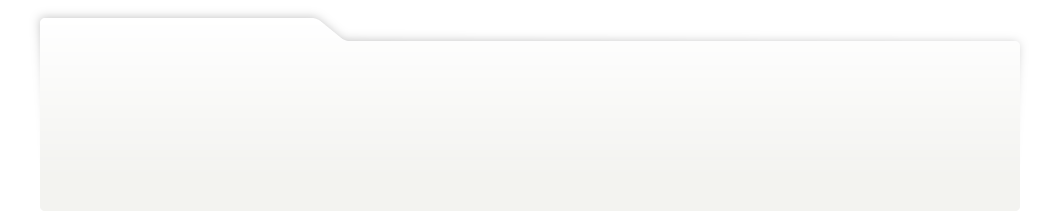
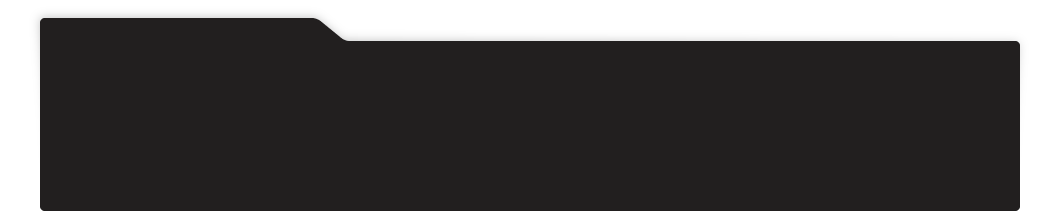
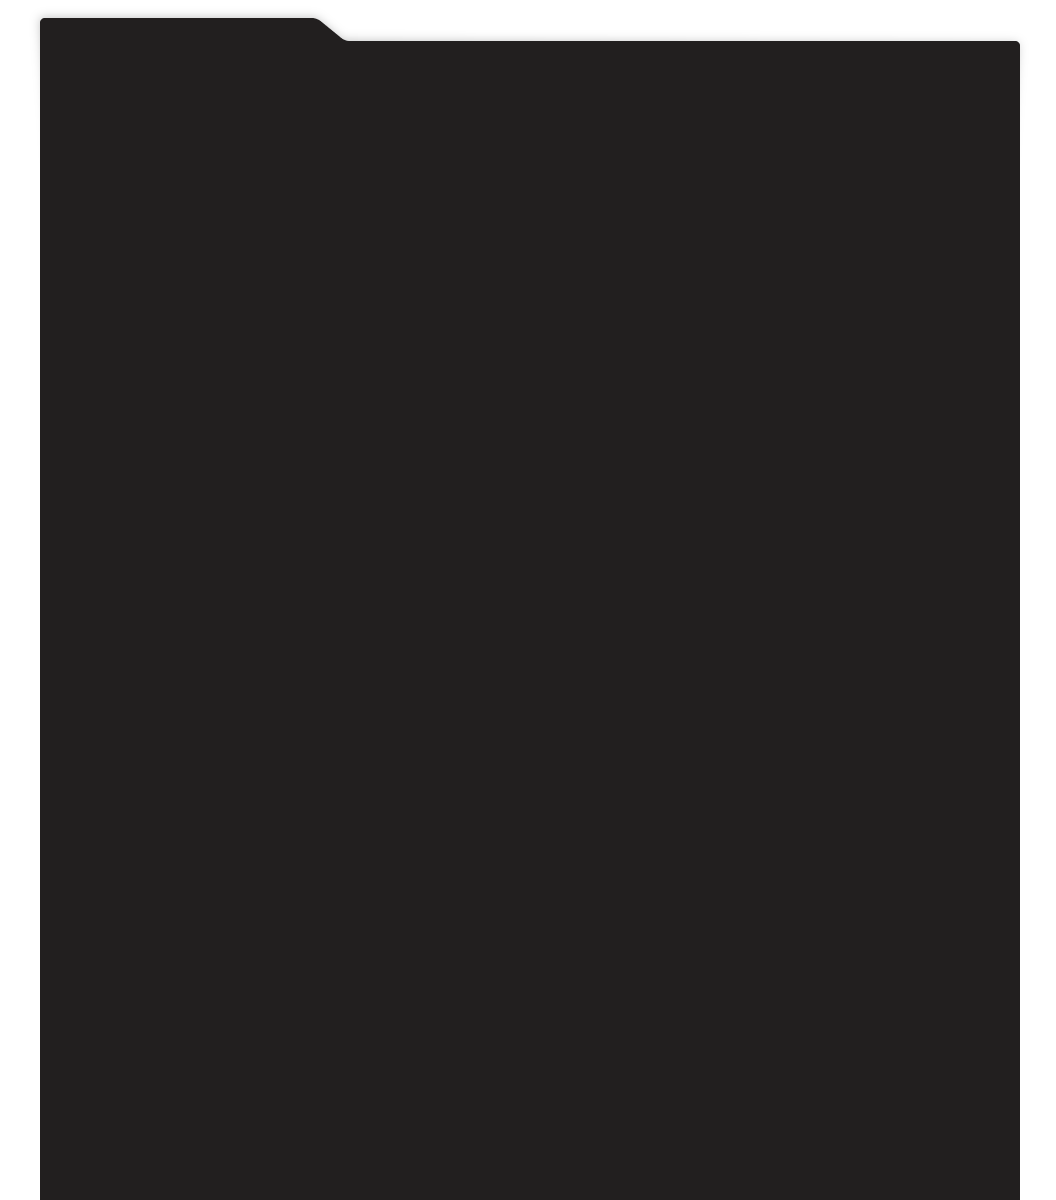
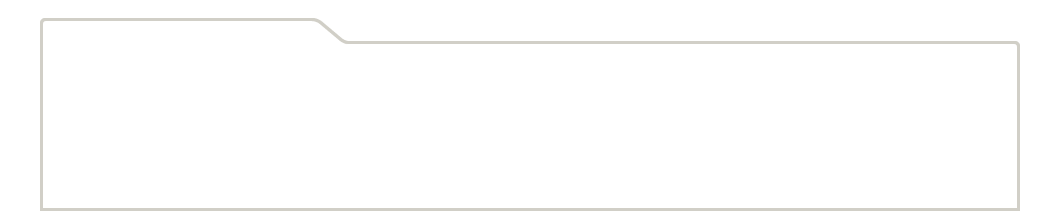
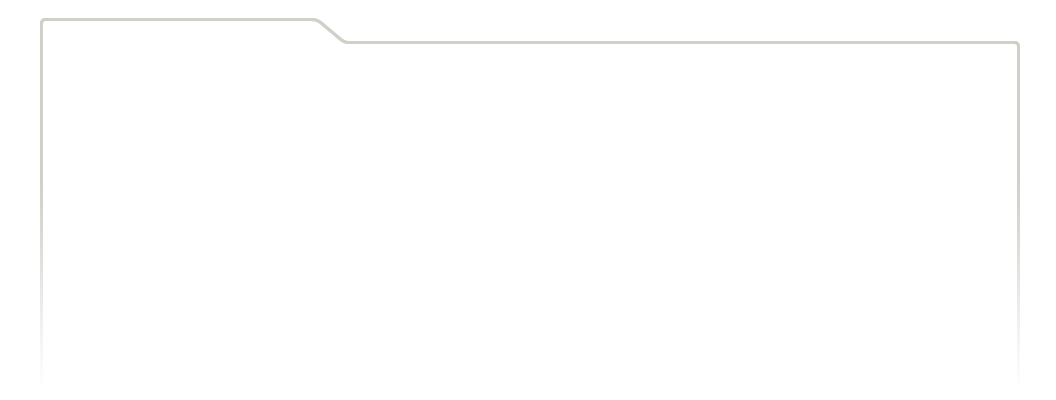
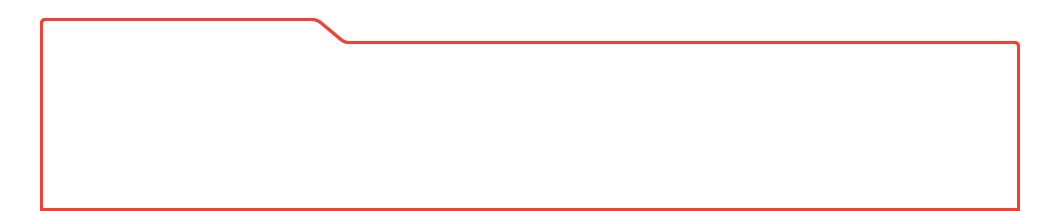
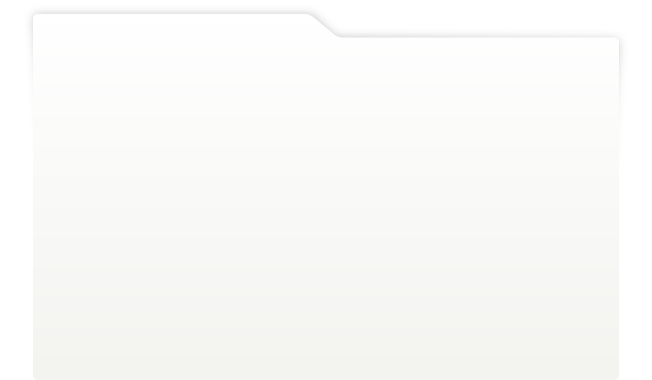
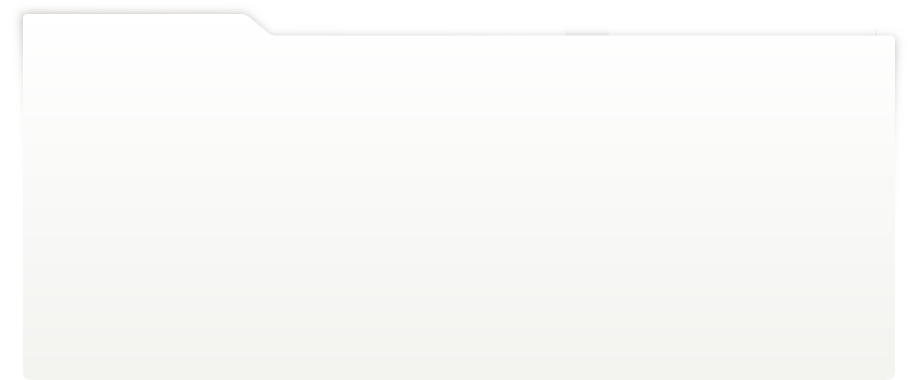
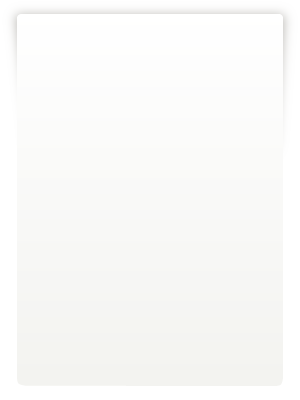
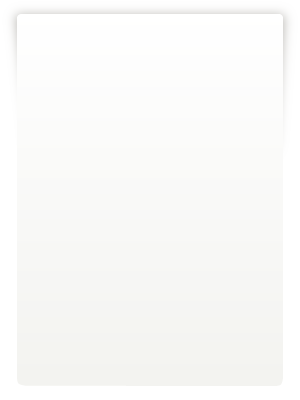
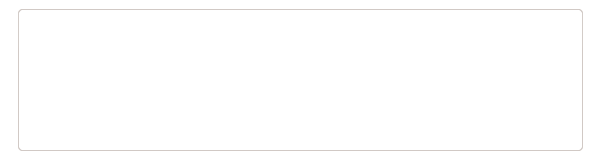
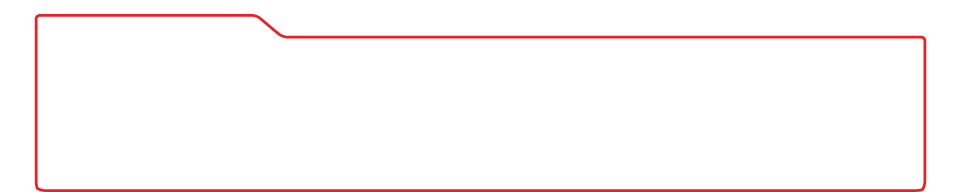
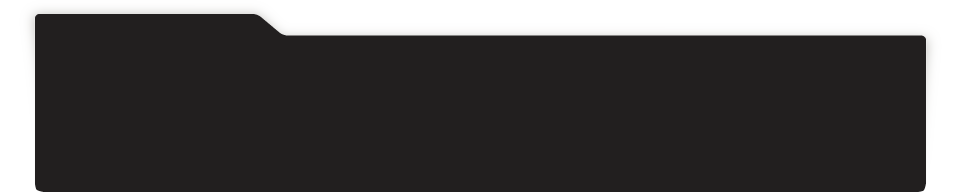
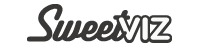
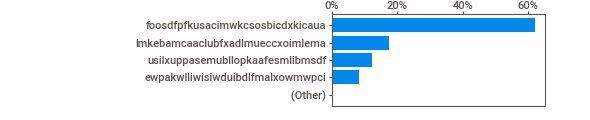
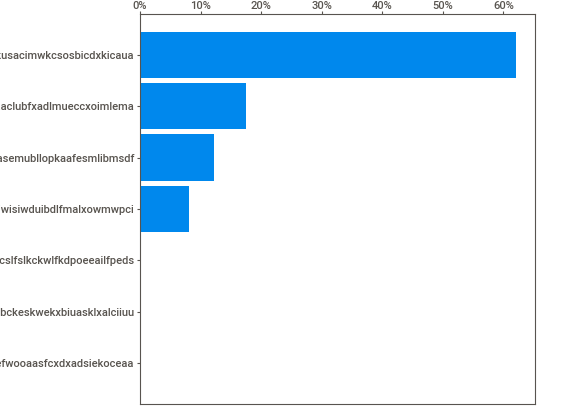
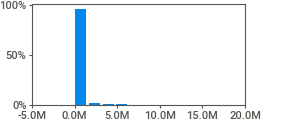
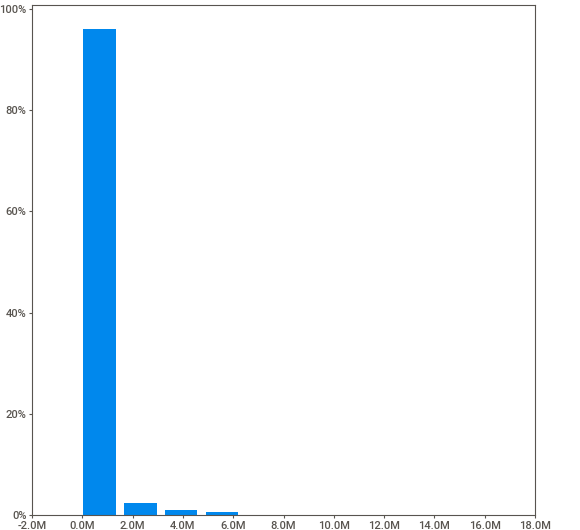
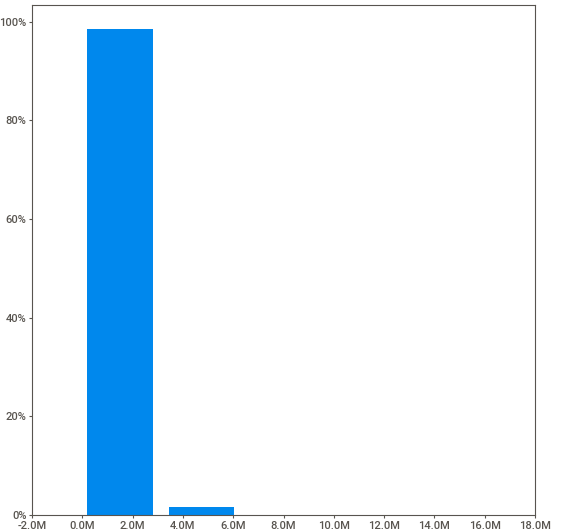
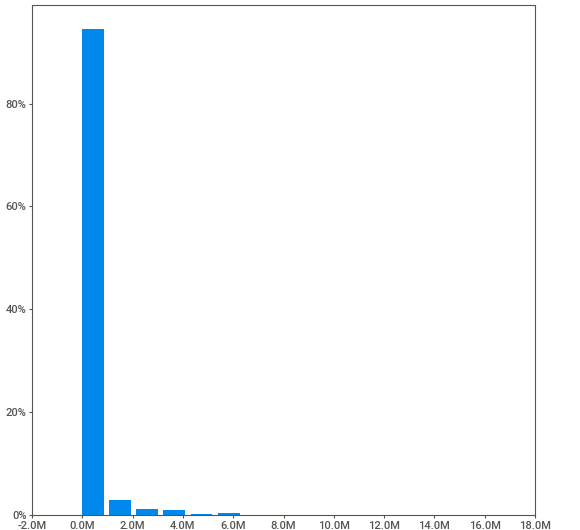
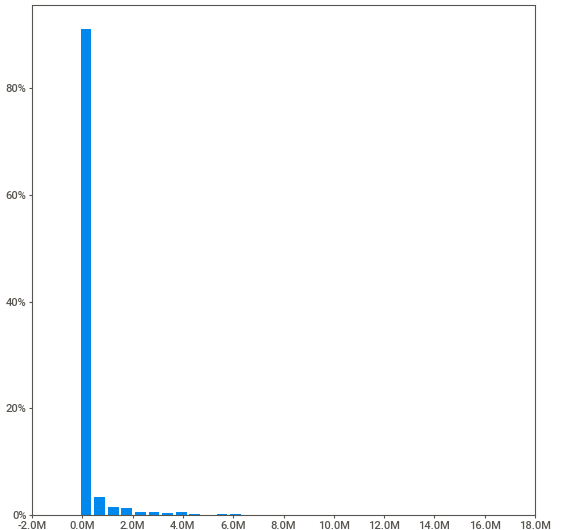
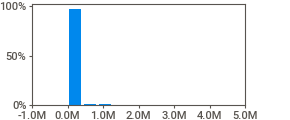
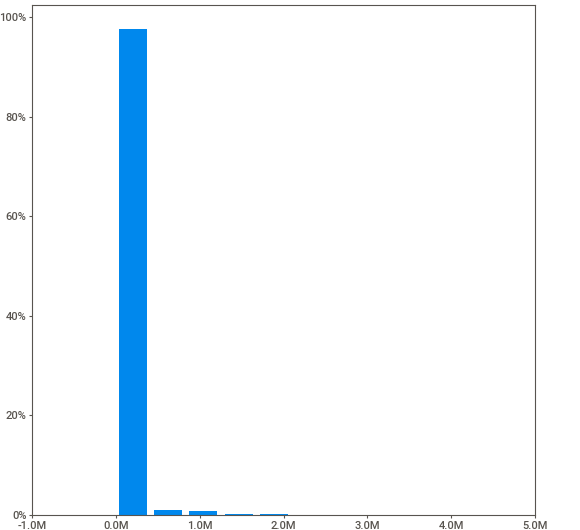
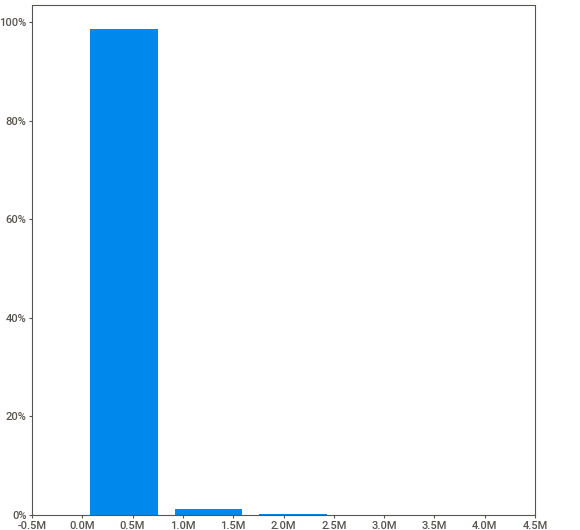
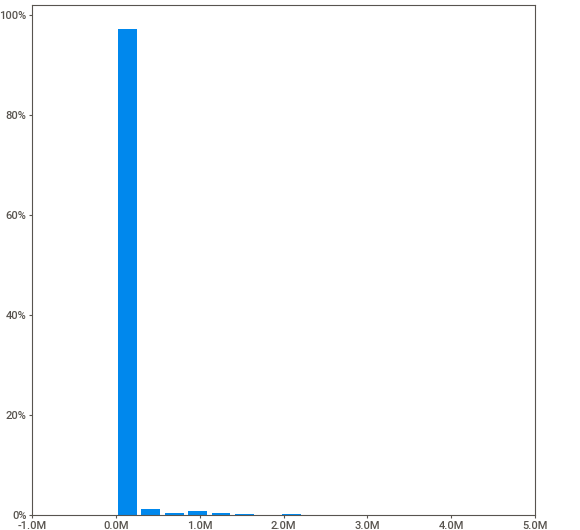
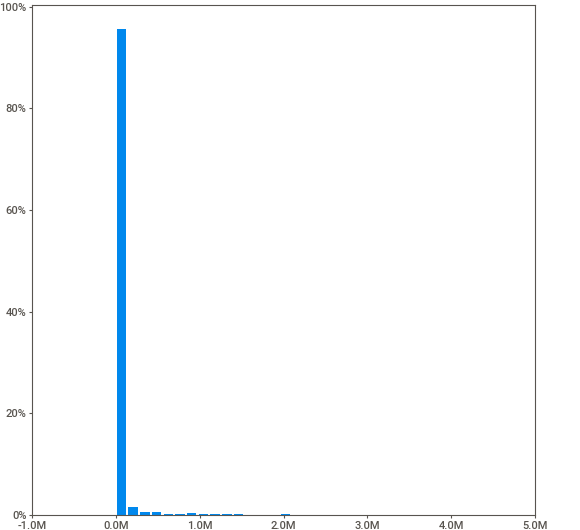
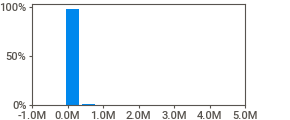
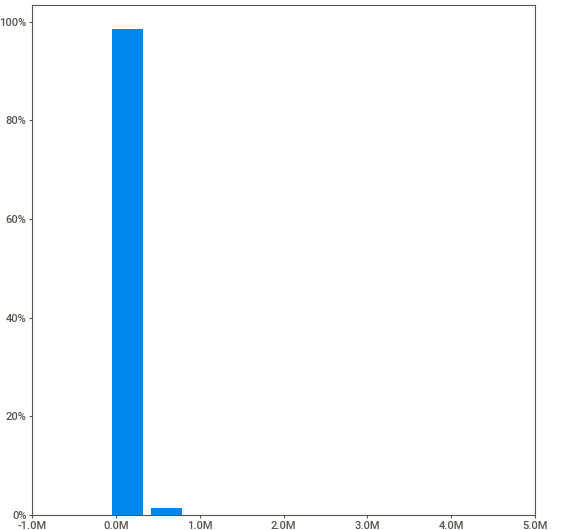
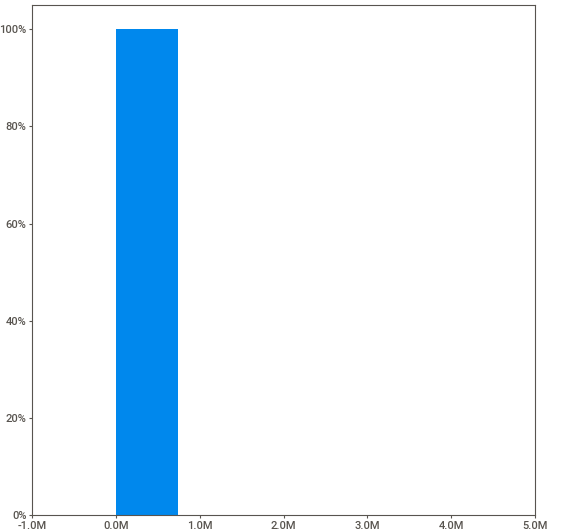
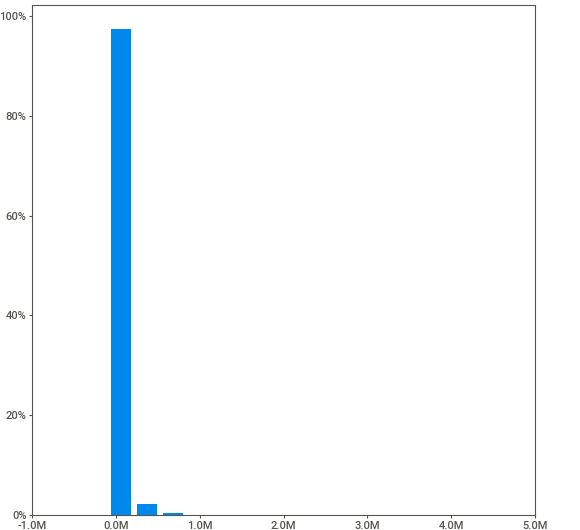
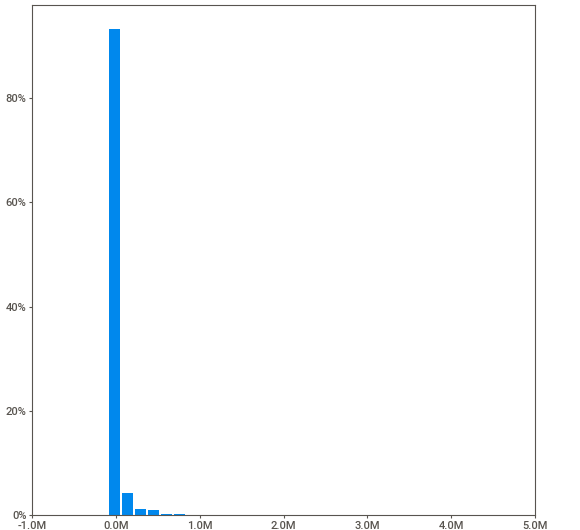
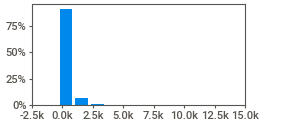
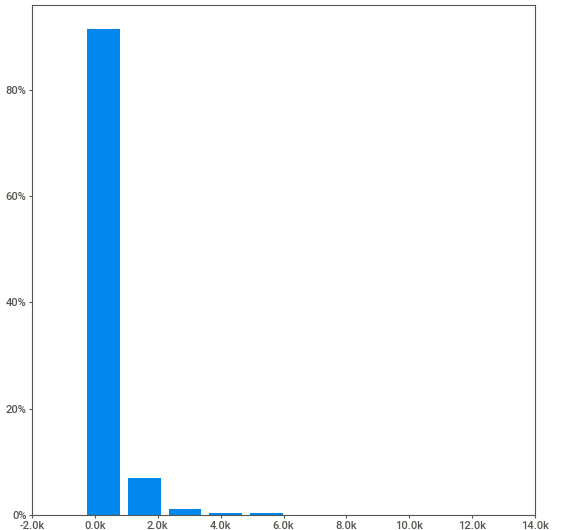
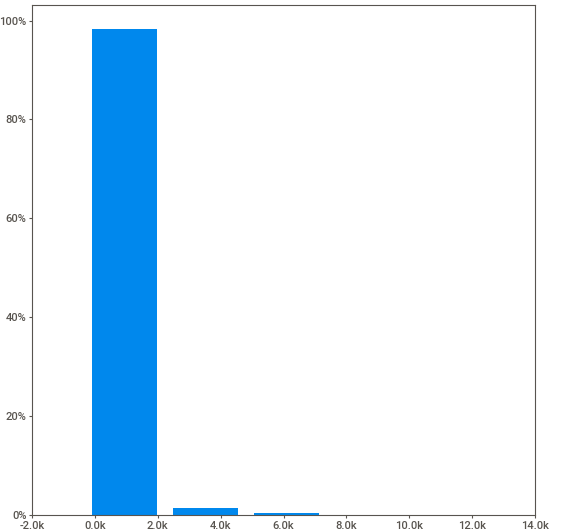
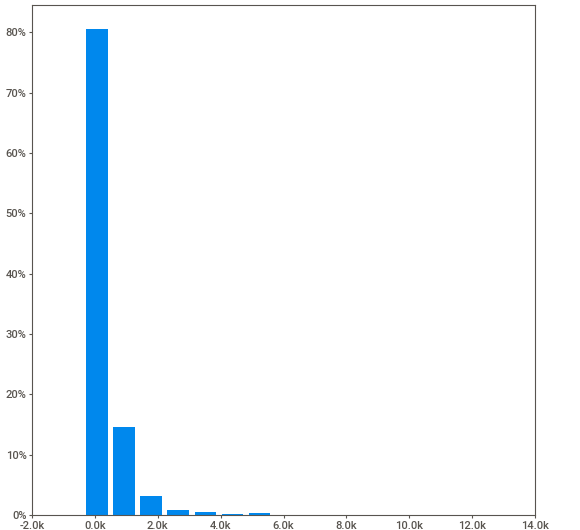
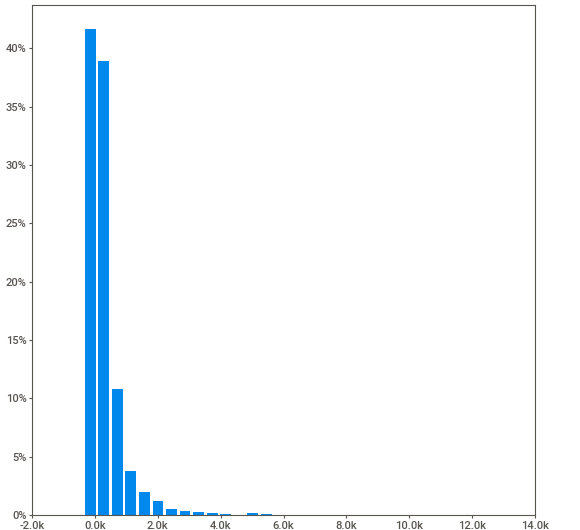
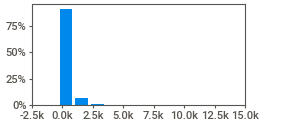
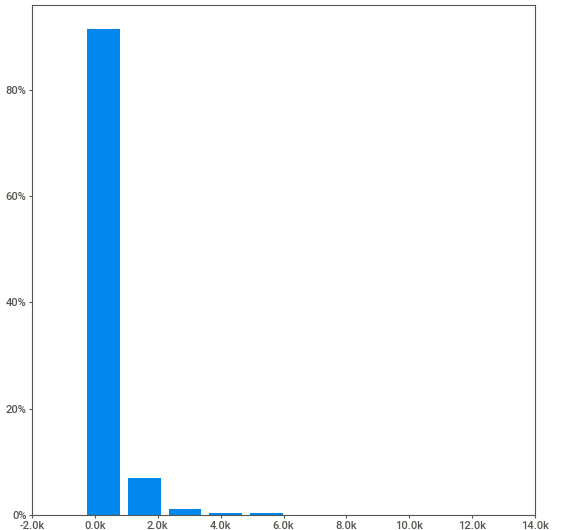
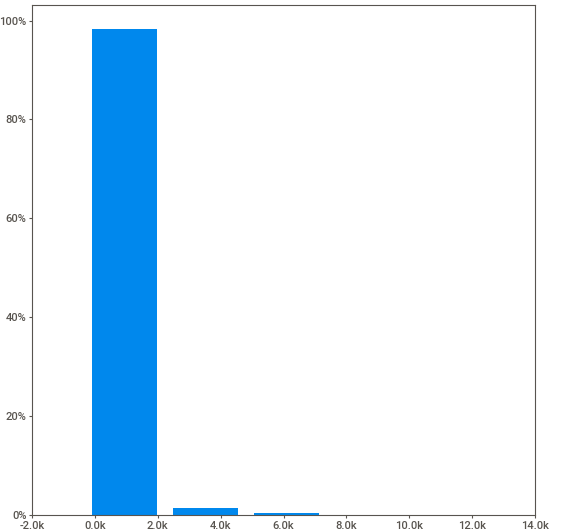
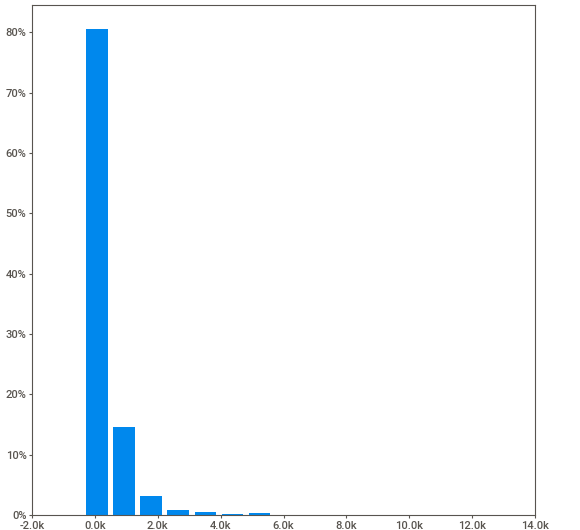
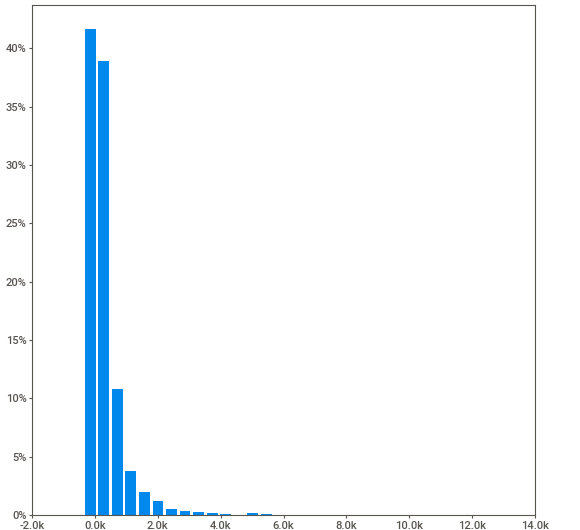
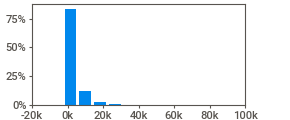
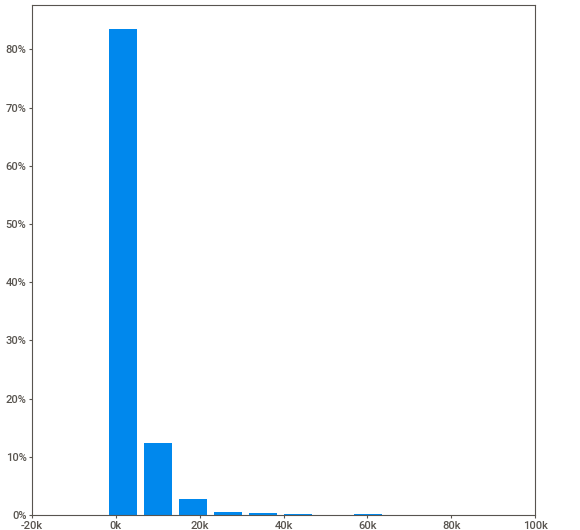
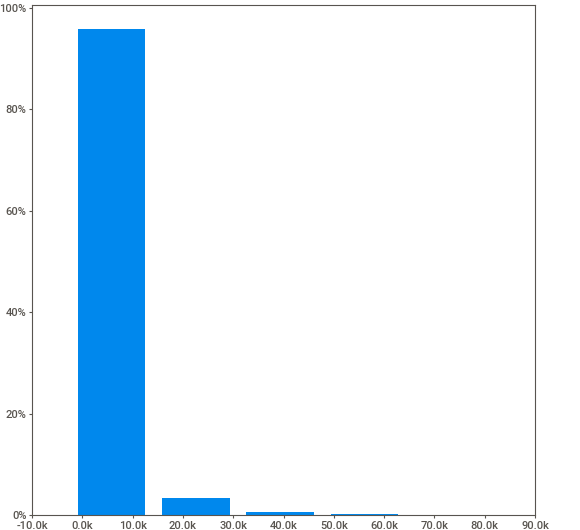
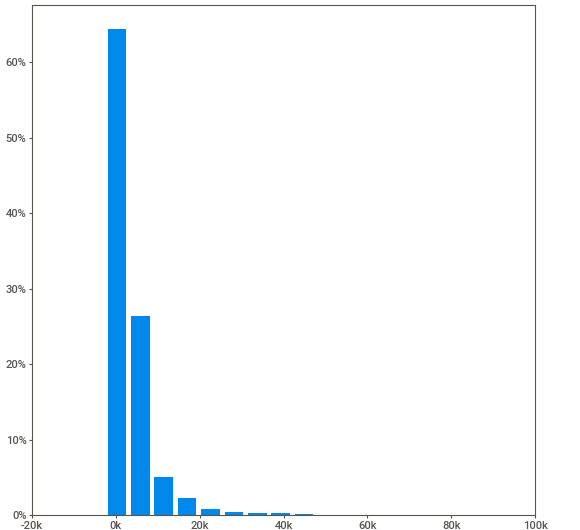
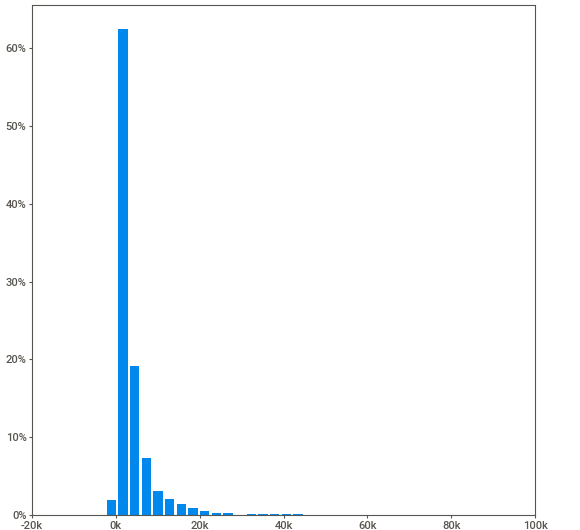
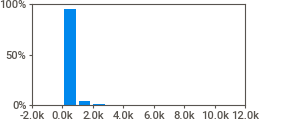
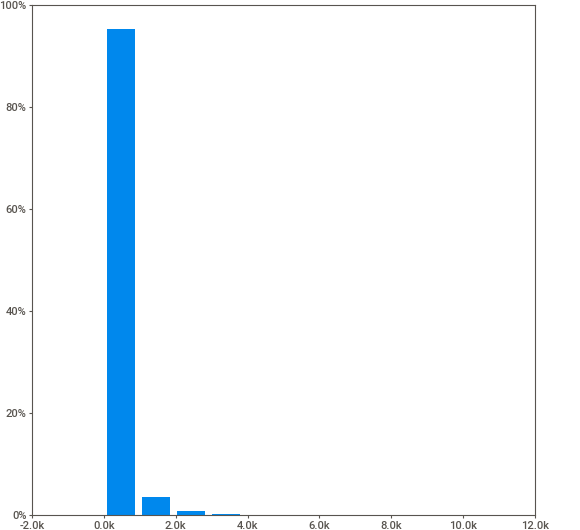
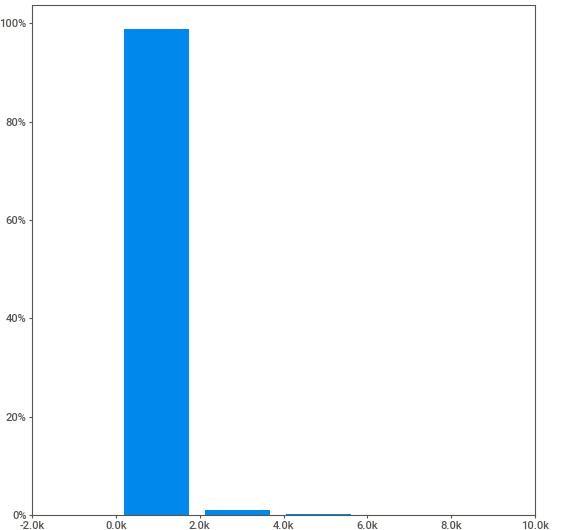
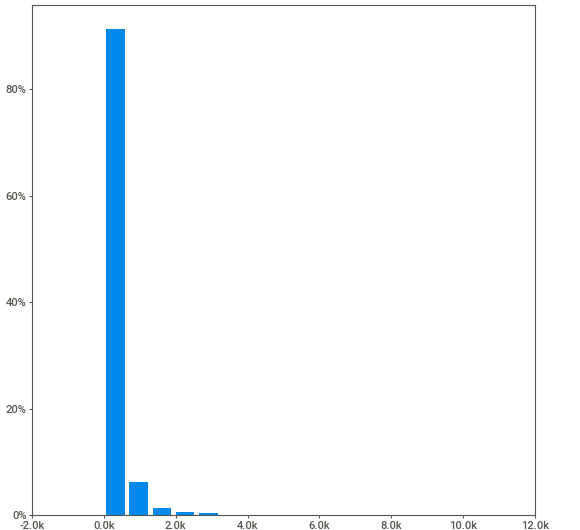
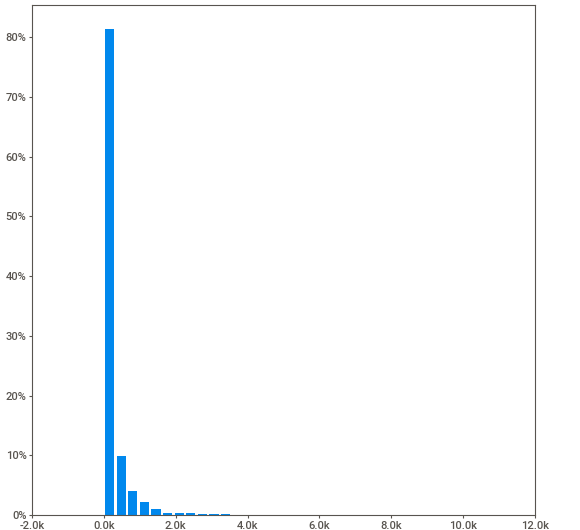
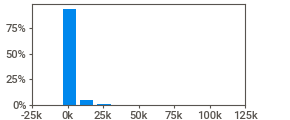
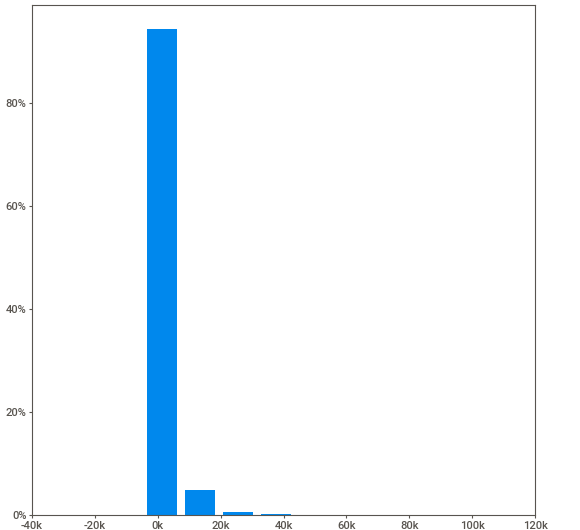
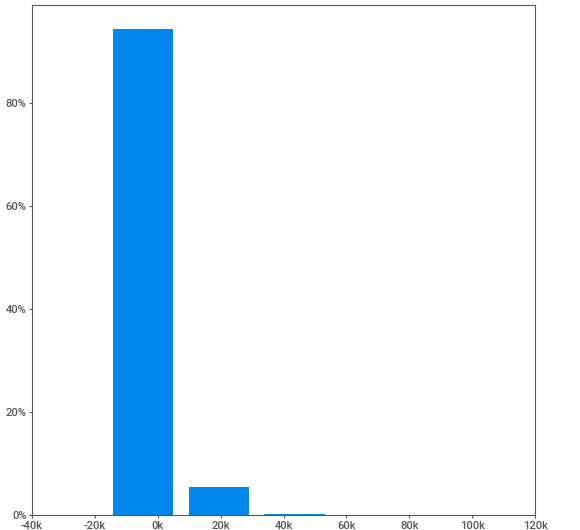
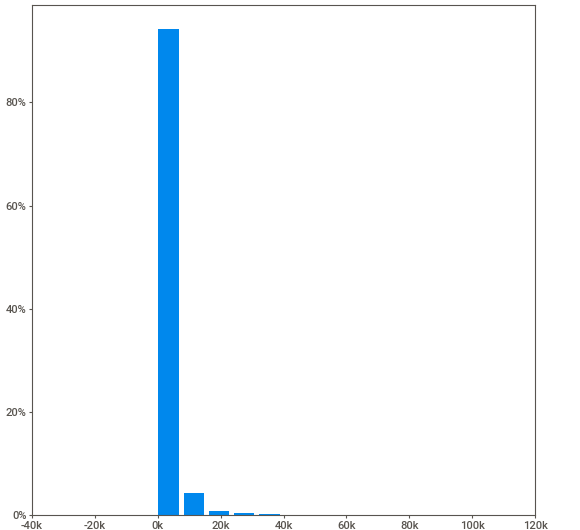
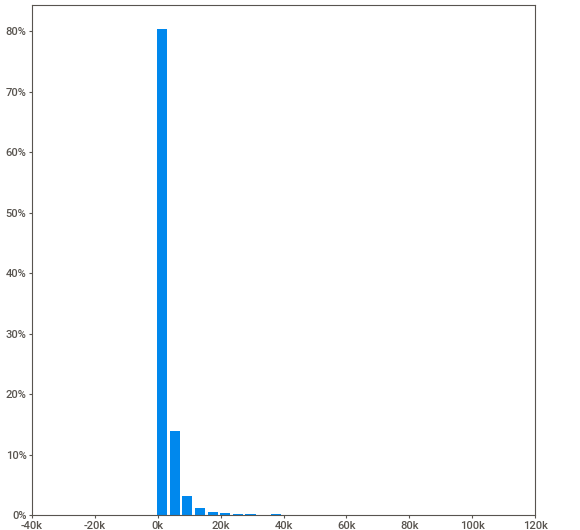
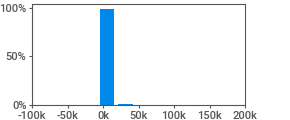
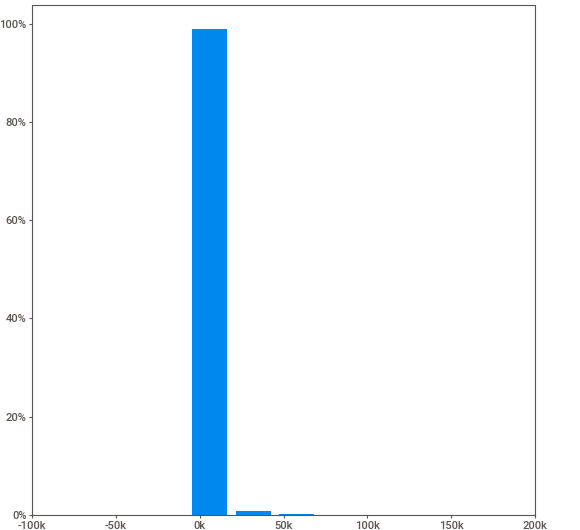
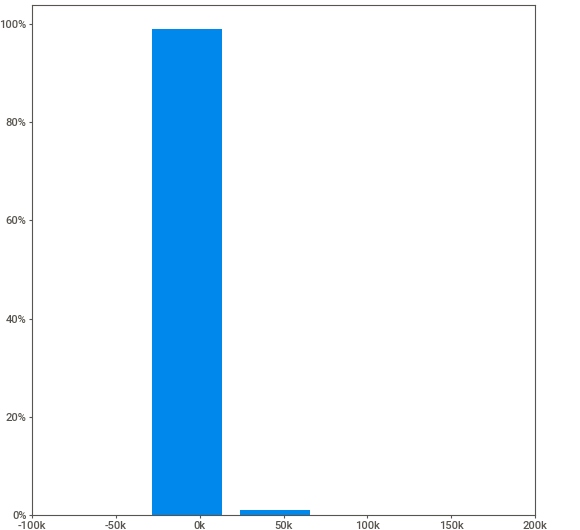
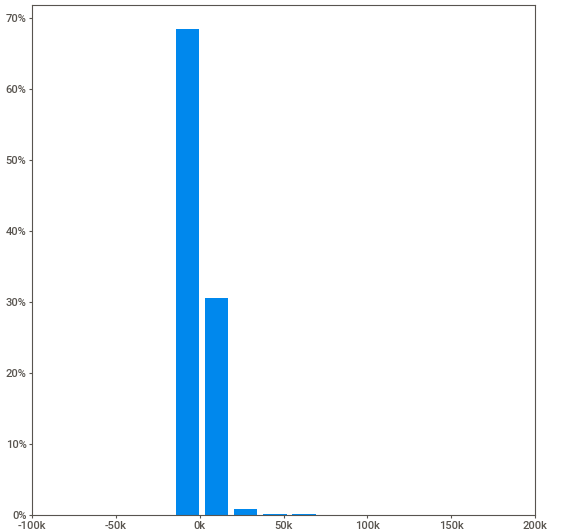
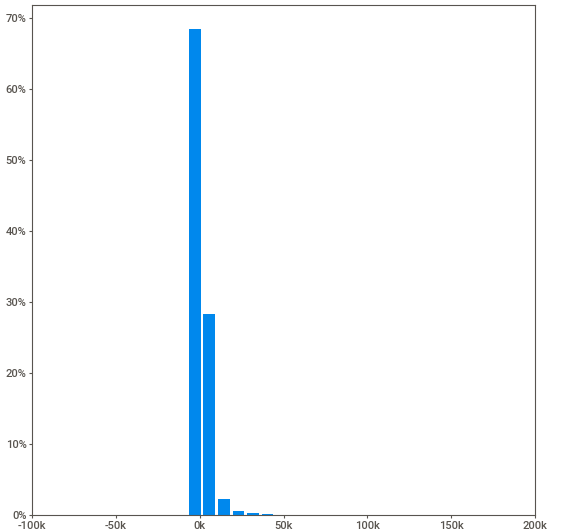
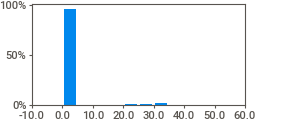
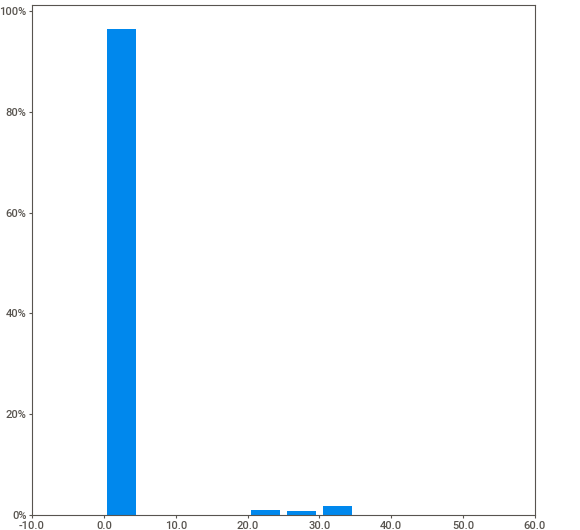
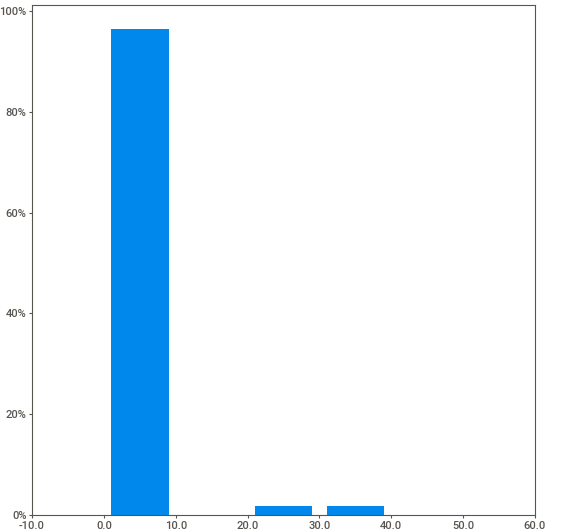
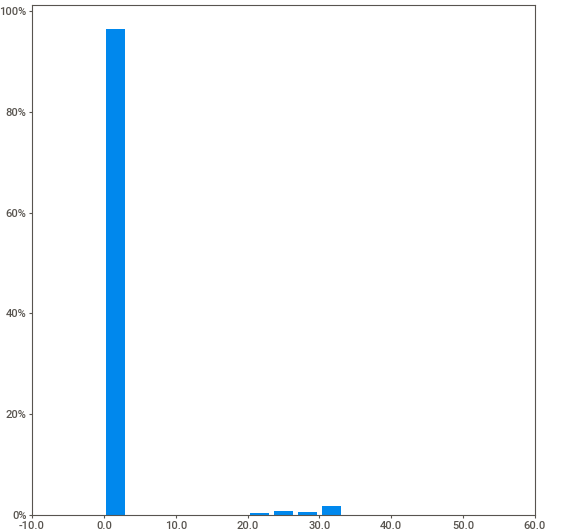
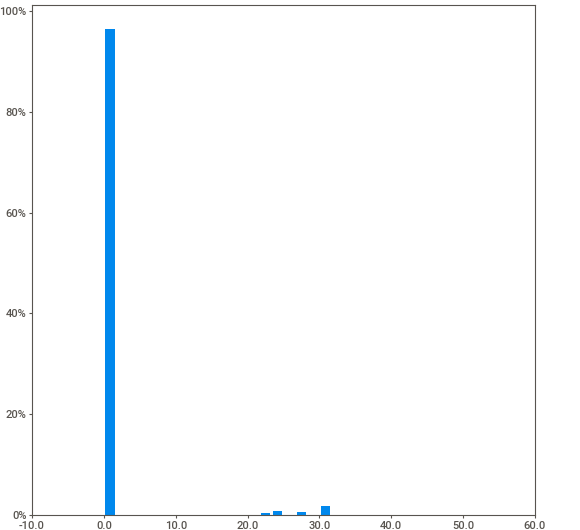
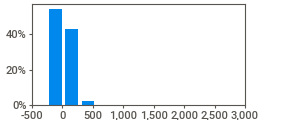
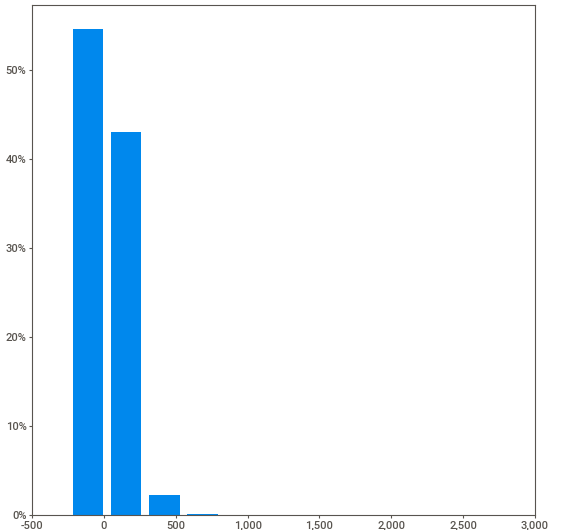
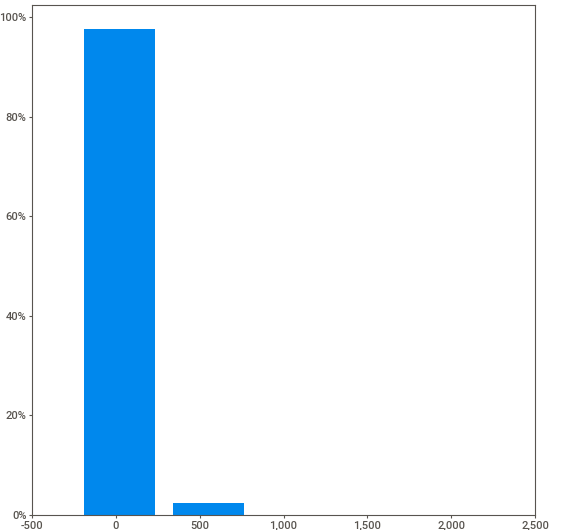
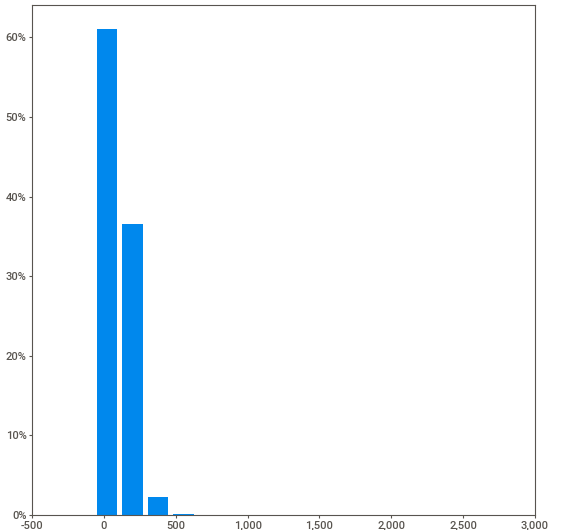
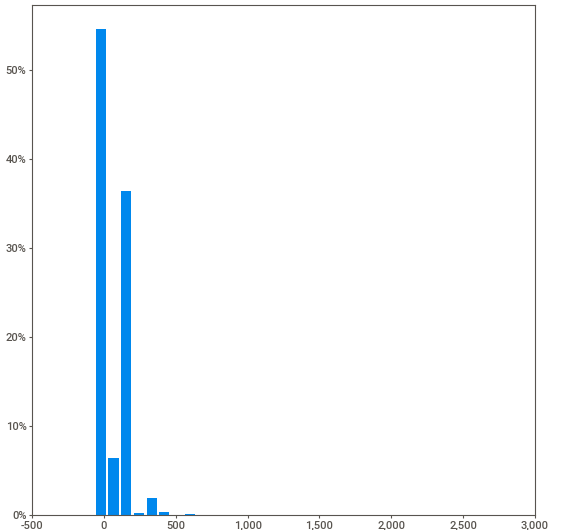
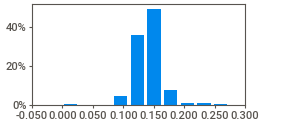
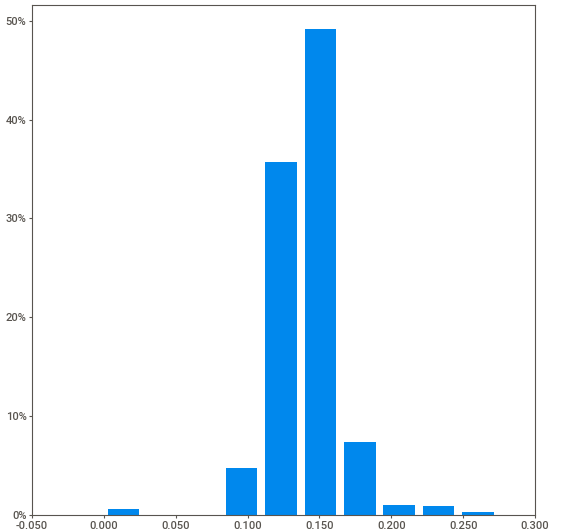
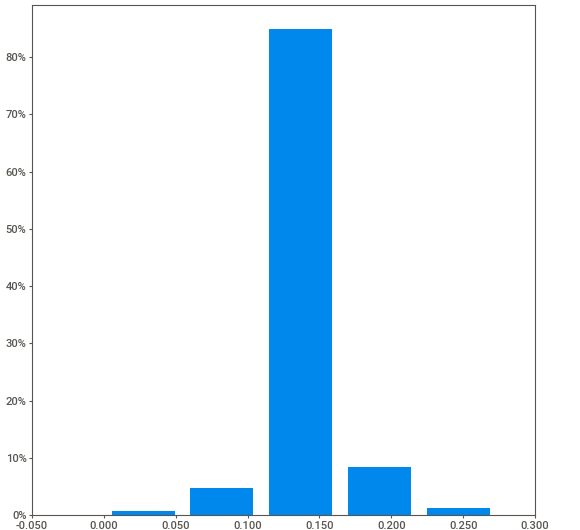
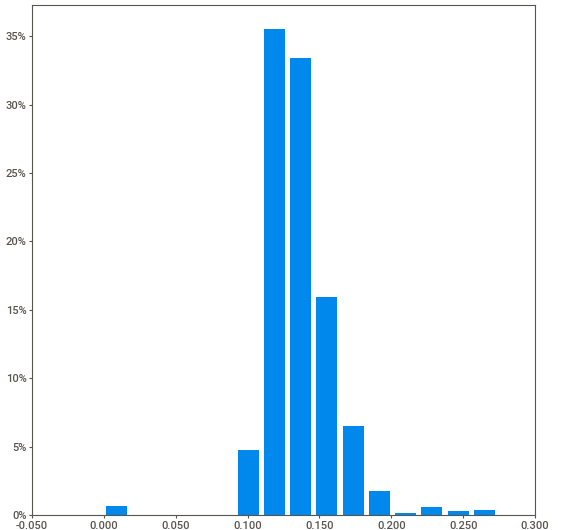
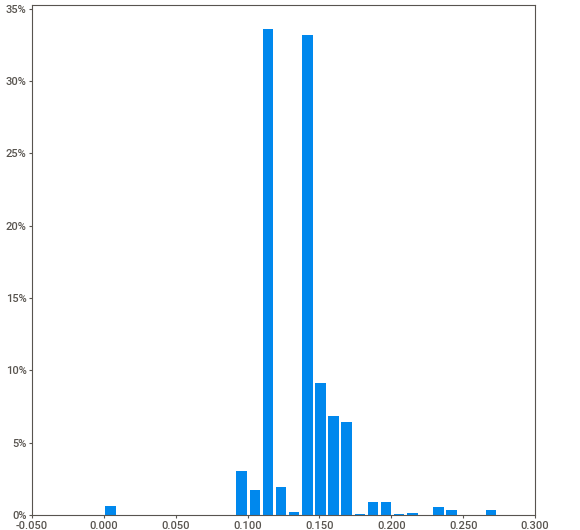
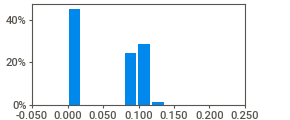
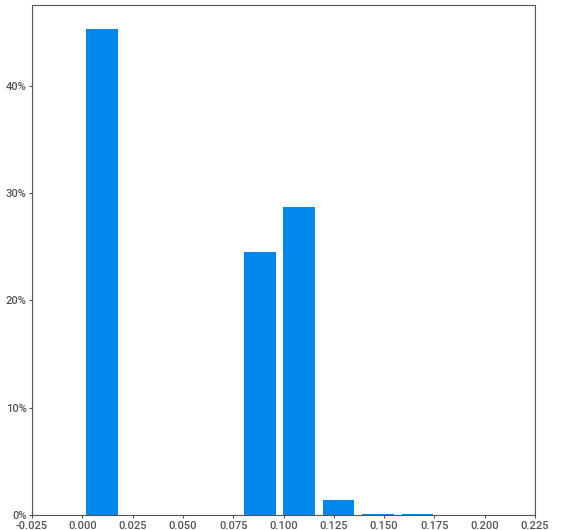
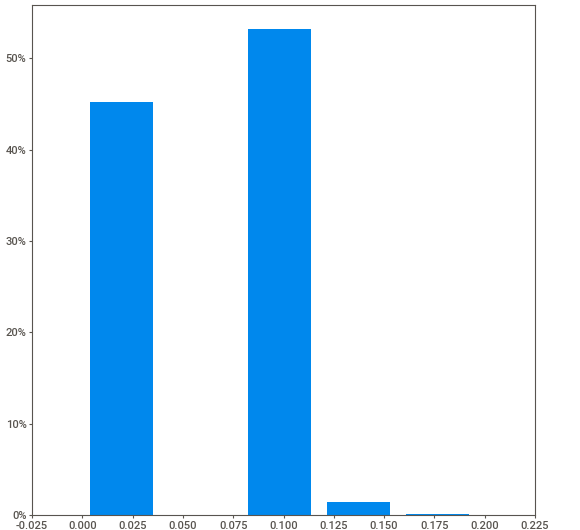
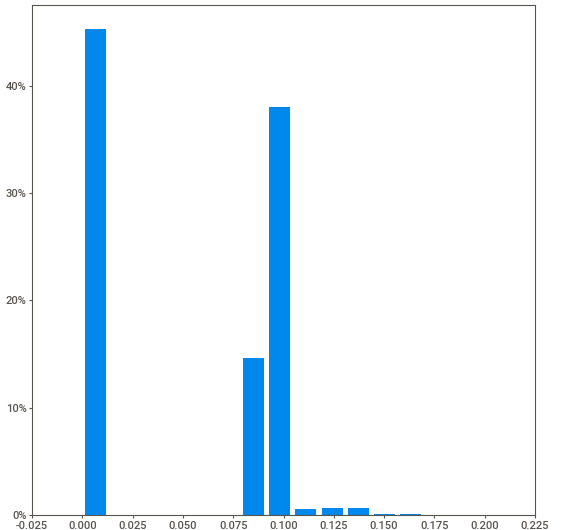
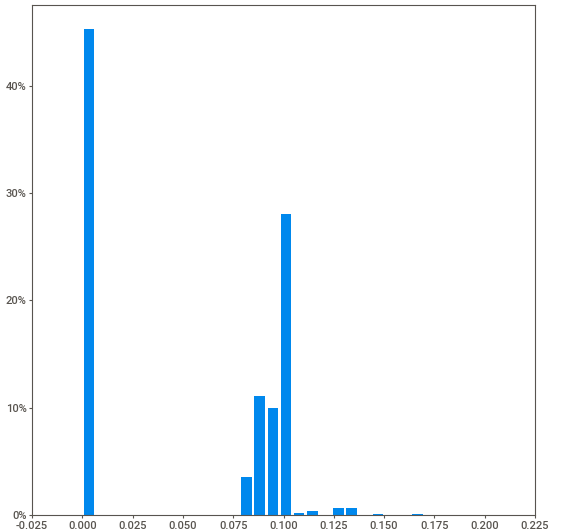
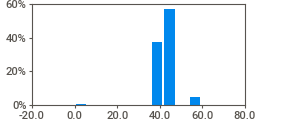
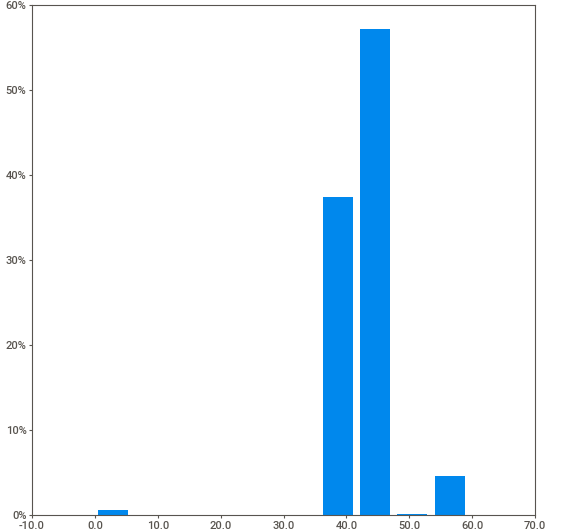
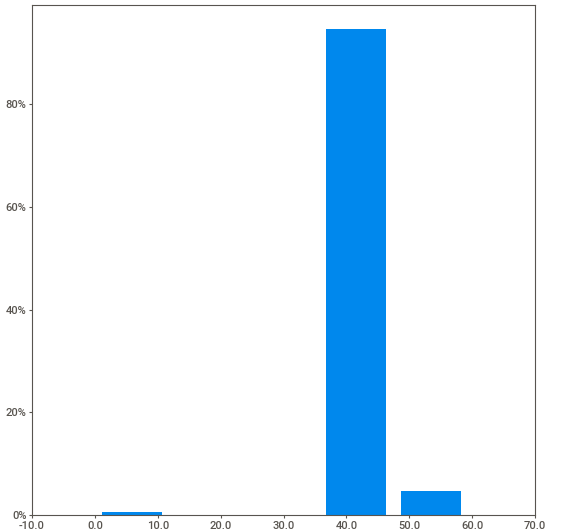
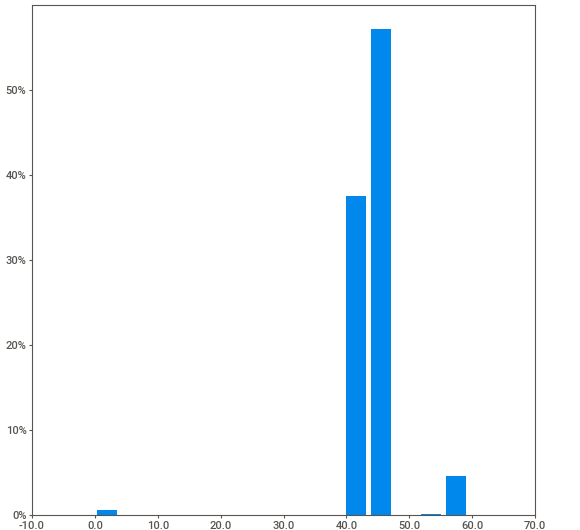
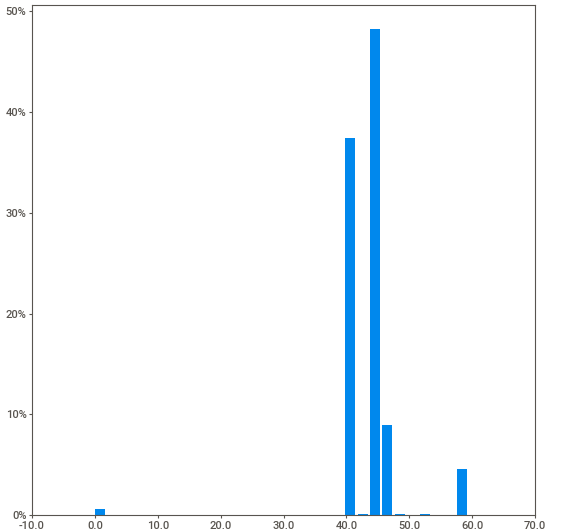
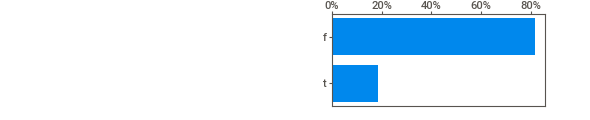
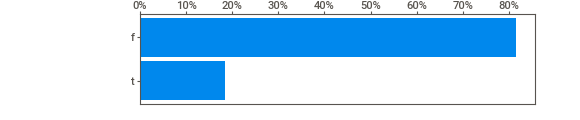
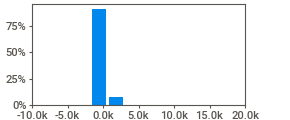
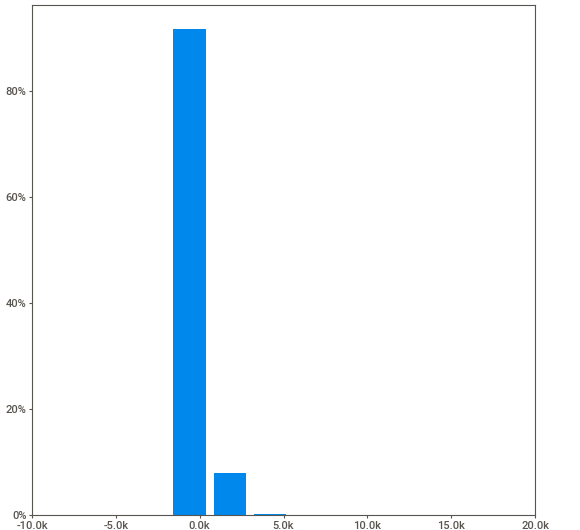
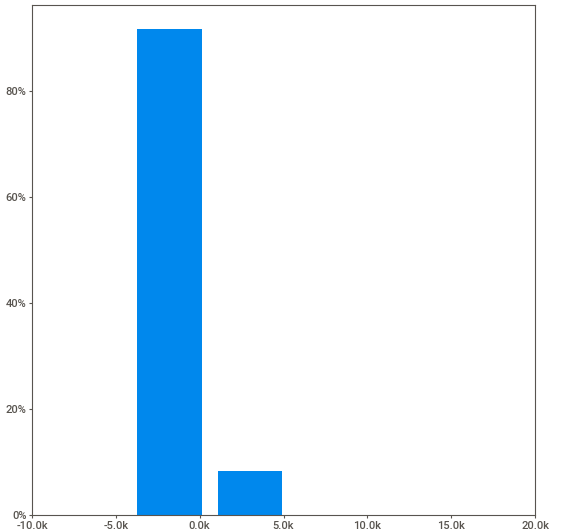
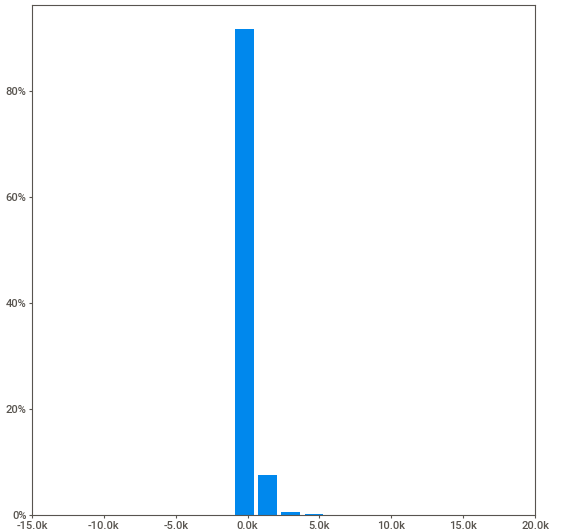
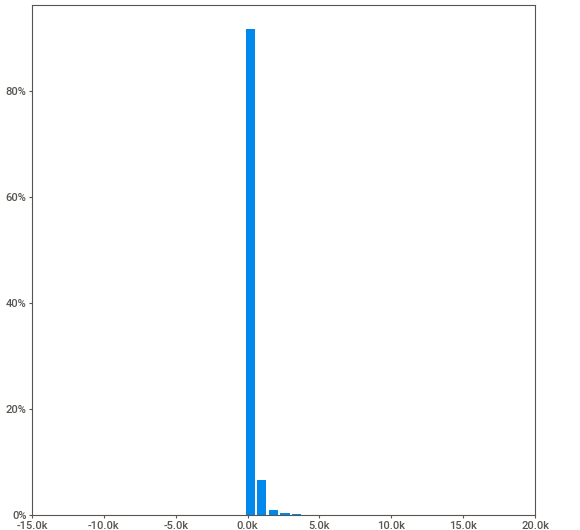
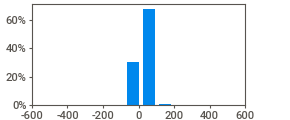
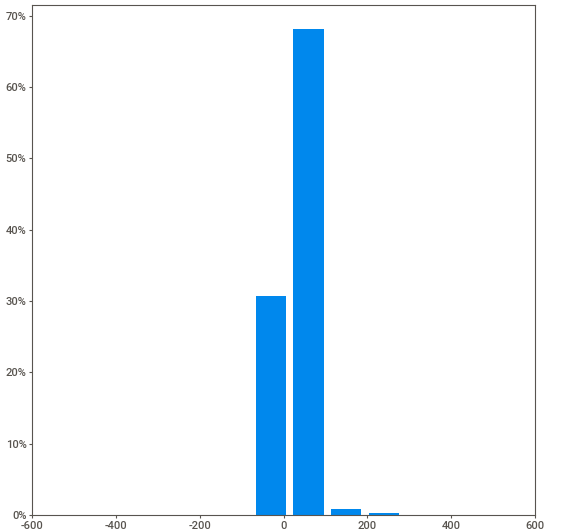
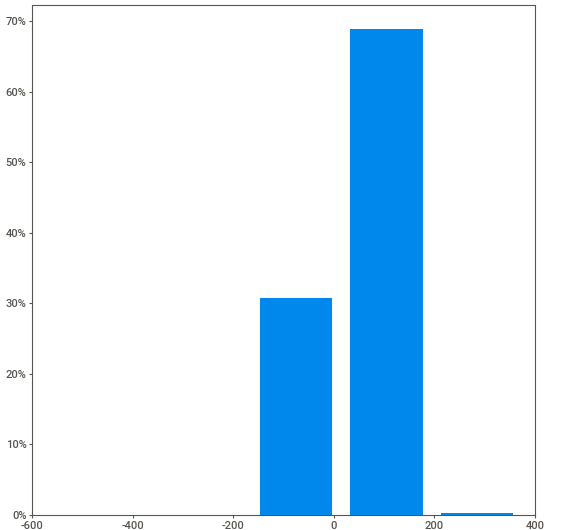
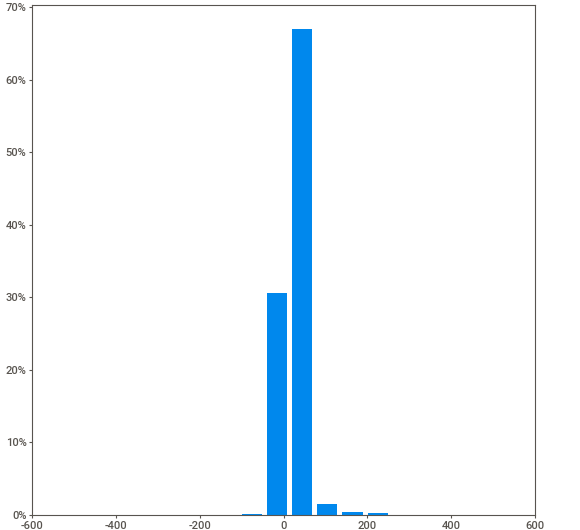
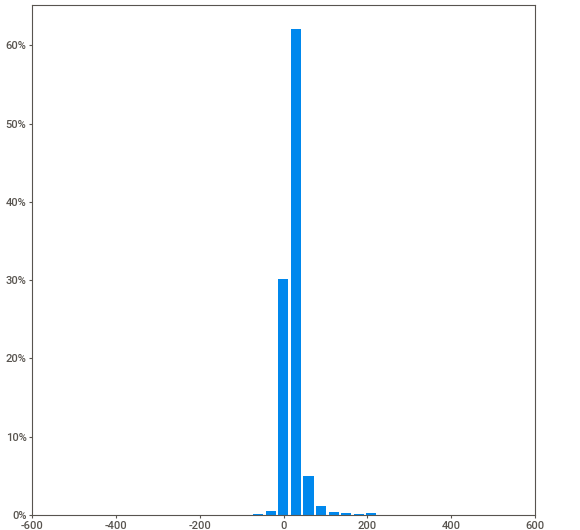
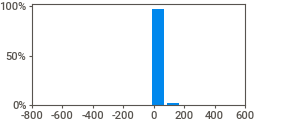
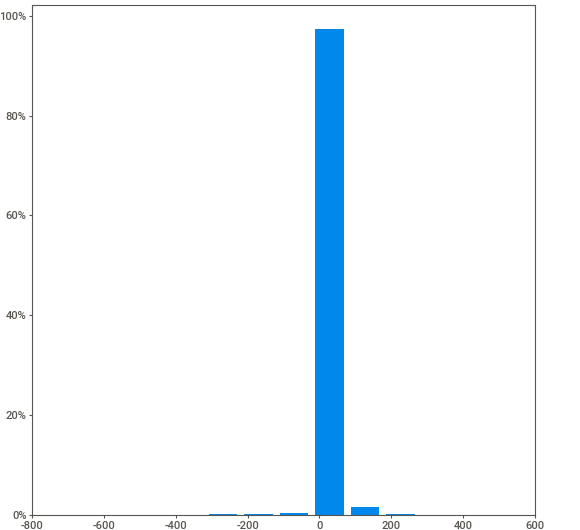
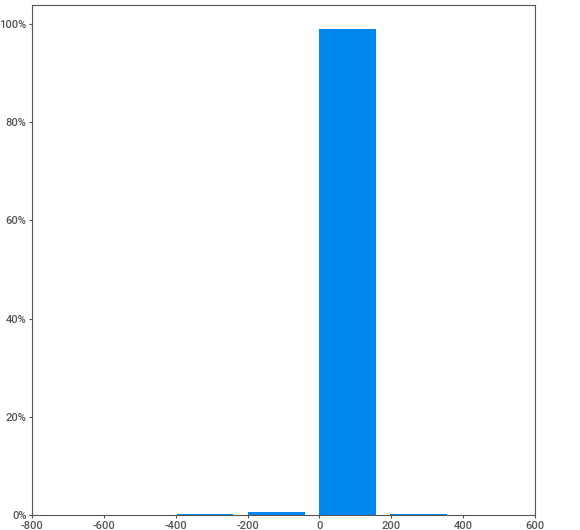
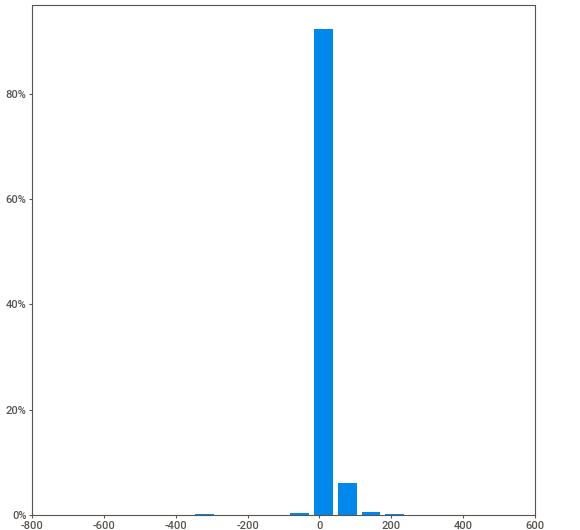
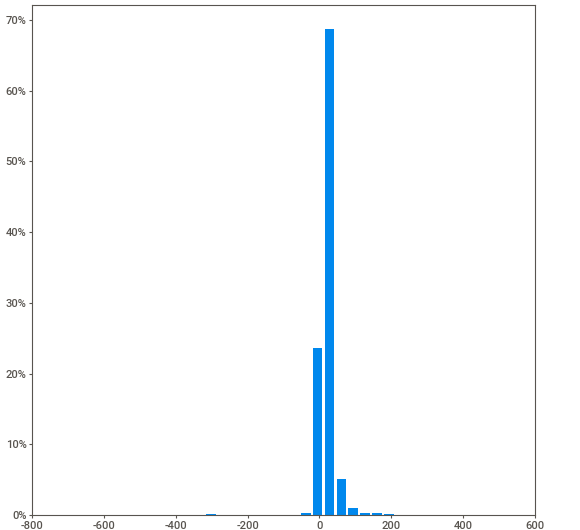
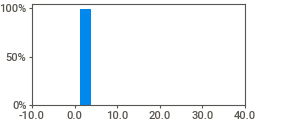
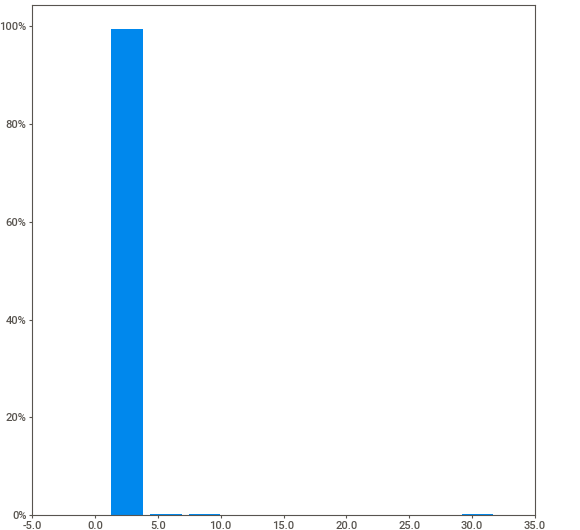
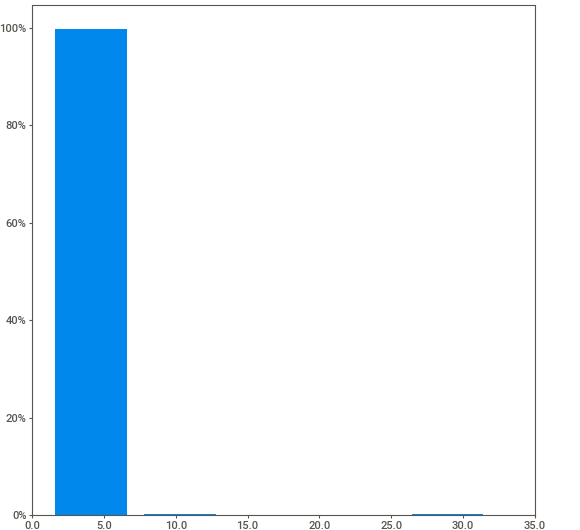
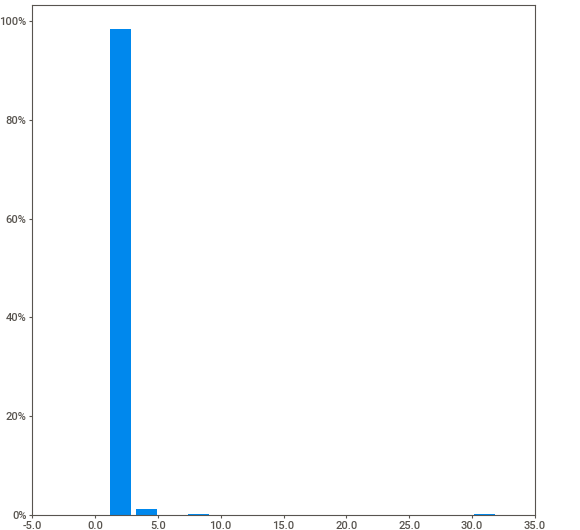
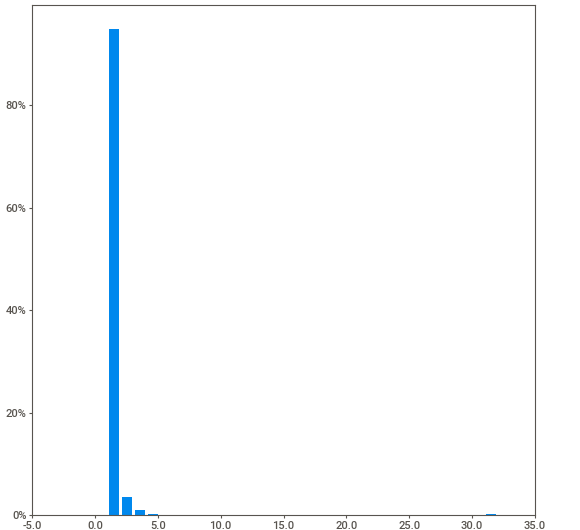
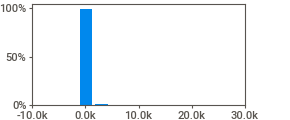
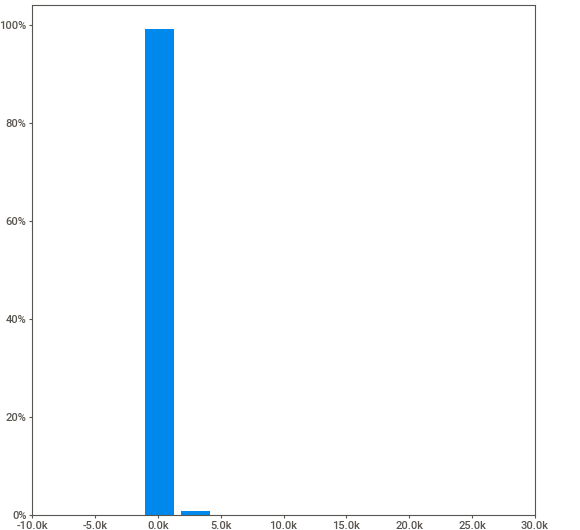
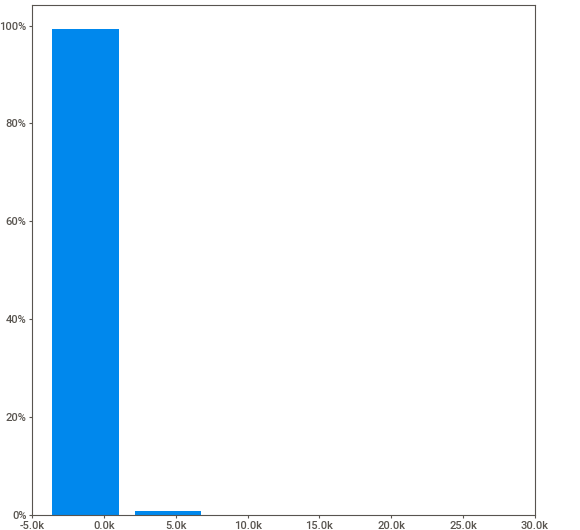
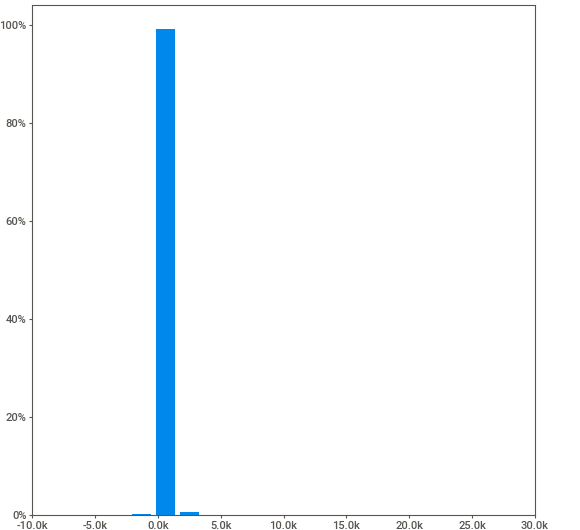
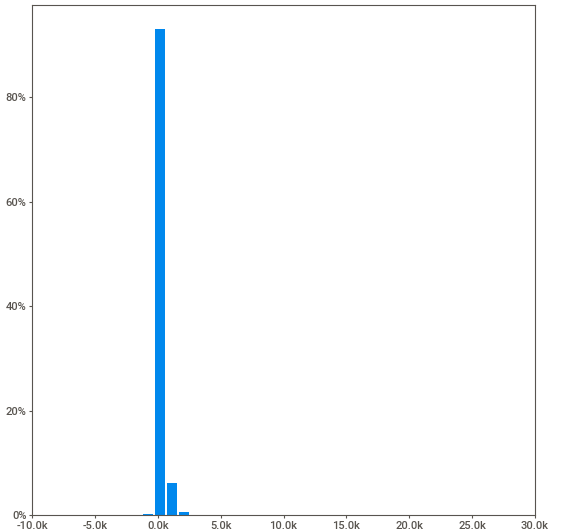
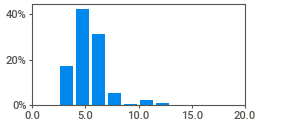
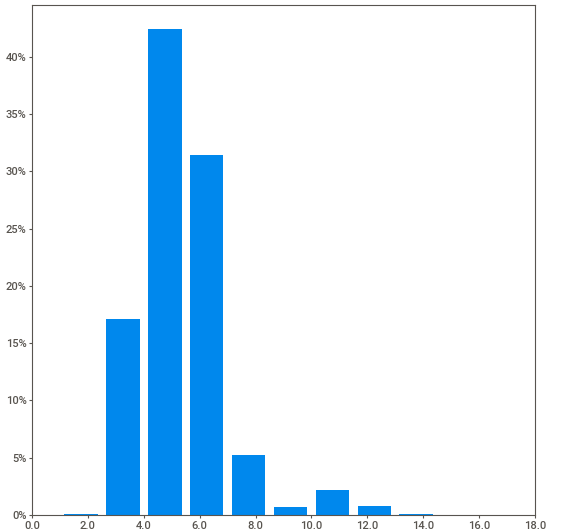
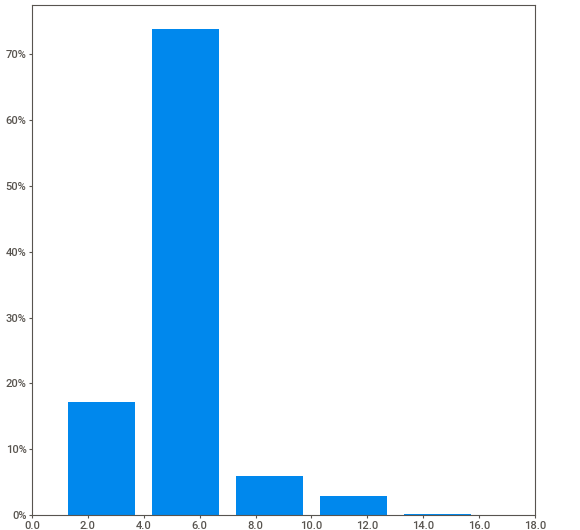
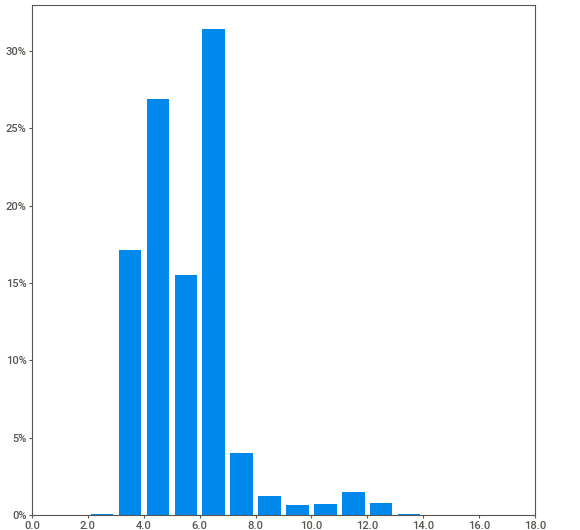
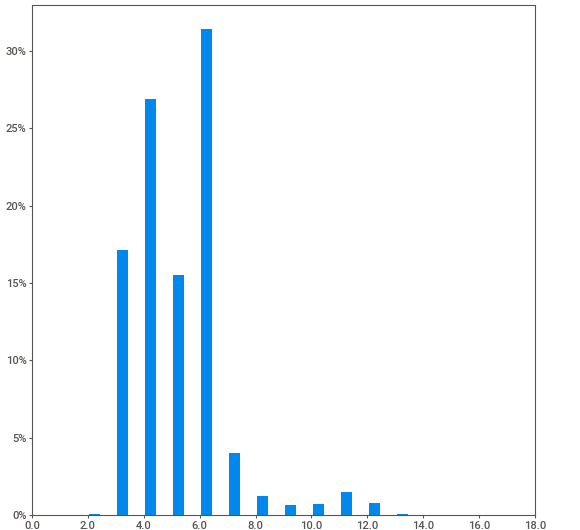
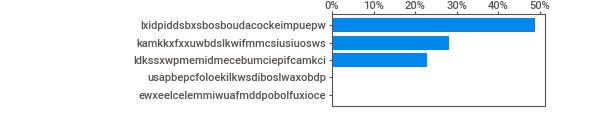
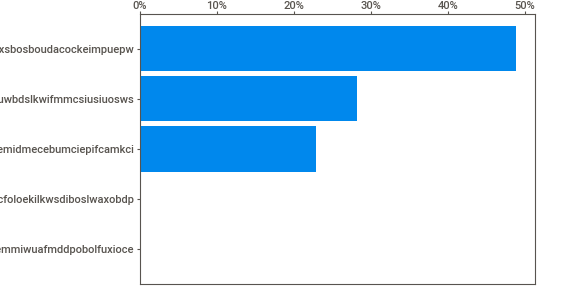
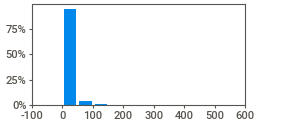
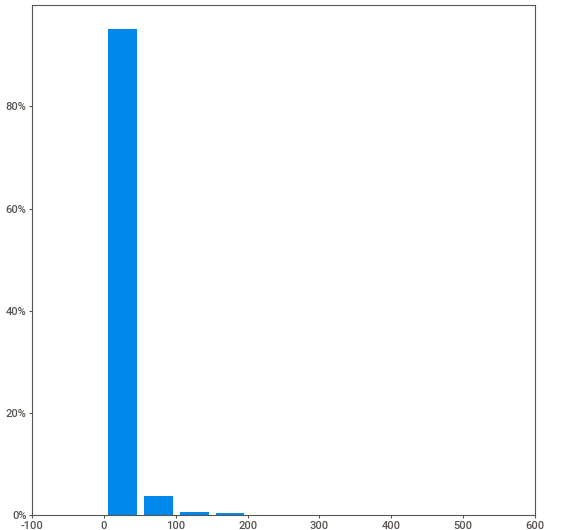
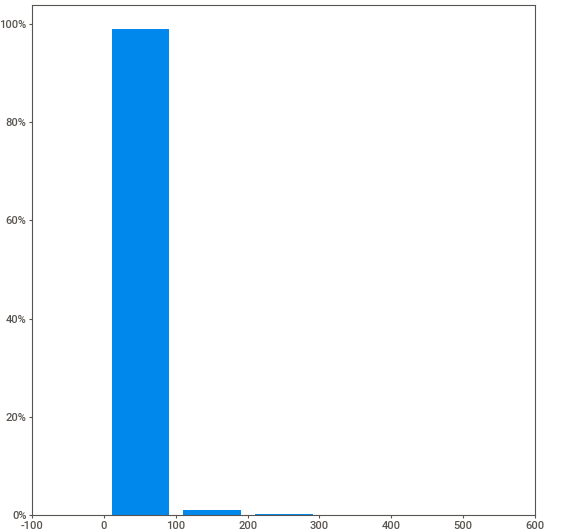
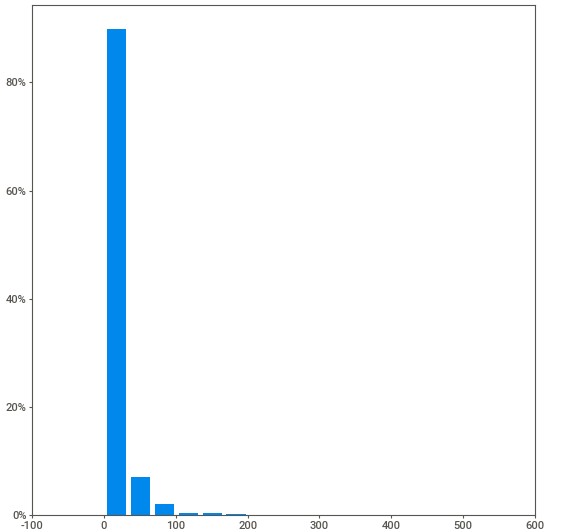
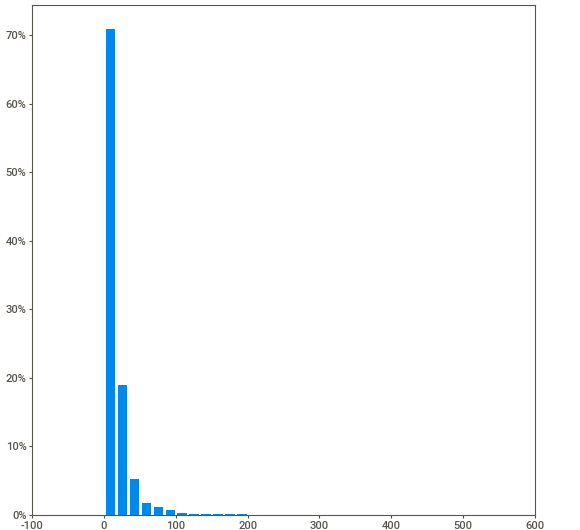
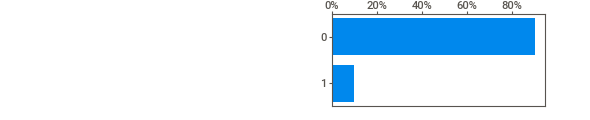
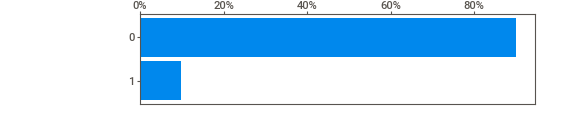
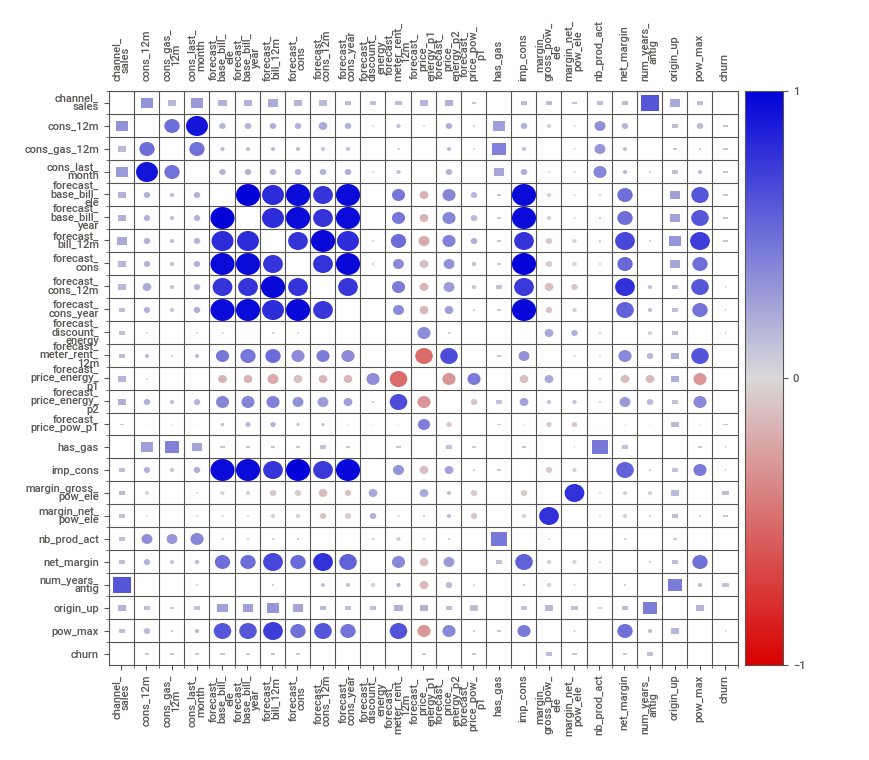
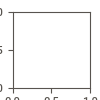

In [12]:

analysis_report = sv.analyze(training_df)# perform EDA analysis
analysis_report.show_notebook()


# EDA Analysis
Using SweetViz, one is able to get a feel of the data. In the data cleaning process, we can identify columns that are candidates for imputation if the missing values are few, eg **<10%** and also columns that have way too many missing values that may be candidates for dropping entirely.

In [30]:
# Drop columns with high % of missing values.
training_df.drop([
                  'activity_new',
                  'campaign_disc_ele',
                  'date_first_activ',
                  'forecast_base_bill_ele',
                  'forecast_base_bill_year',
                  'forecast_bill_12m',
                  'forecast_cons',

                  ],axis=1, inplace=True)

In [28]:
# convert text data to numerical categorical values
def to_boolean(val):
  if val == 't':
    return 1
  else:
    return 0

training_df['has_gas'] = pd.Categorical(training_df['has_gas'].apply(lambda val: to_boolean(val)))


# Imputing missing values
To impute missing values, one has to check the distribution to see the best imputation method. If the data is very skewed, using mean may not be the best approach since the final values will gravitate towards the higher end of the scale which is False.
After examining the dataset, mode seems to be a viable imputation approach since the data is highly skewed and the most frequent value in mostcases is a large number

In [34]:
# Imputation
# check for missing values
column_list = list(training_df.columns)
unnecessary_columns = ["id",'channel_sales',
                       'churn','has_gas']
imputation_list = list(set(column_list)-set(unnecessary_columns))

for column in imputation_list:
  if training_df[column].isnull().sum()>0:
    training_df[column].fillna(training_df[column].mode()[0],inplace=True)


                                             |          | [  0%]   00:00 -> (? left)


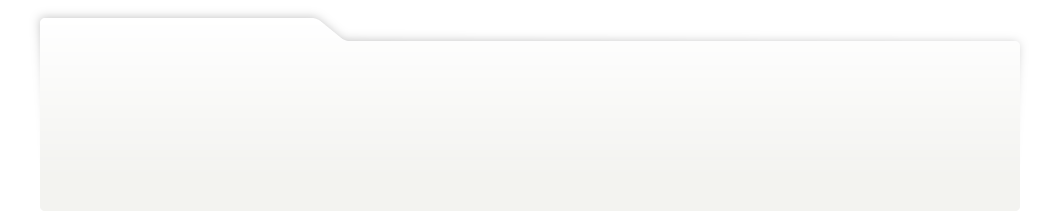
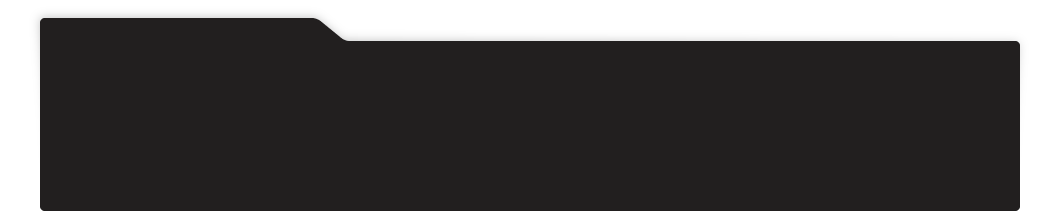
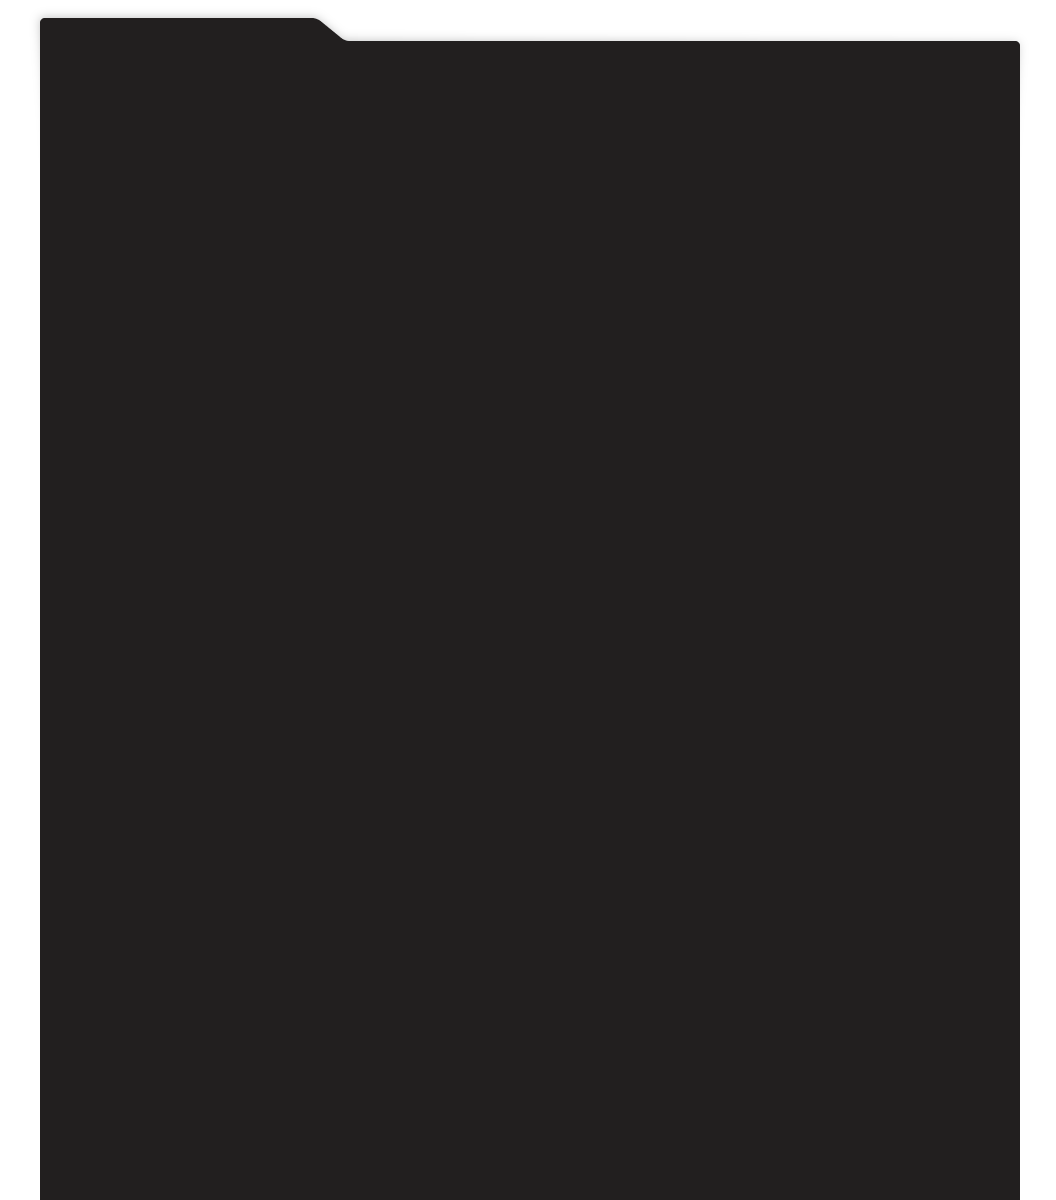
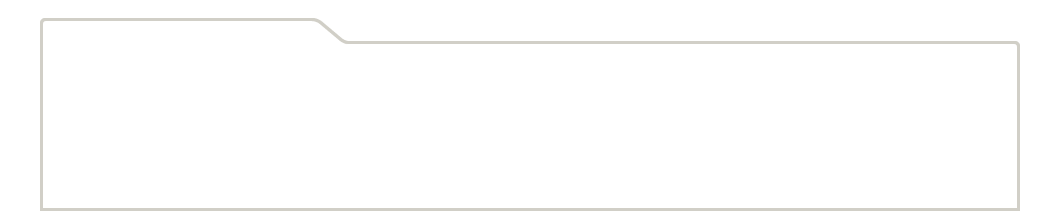
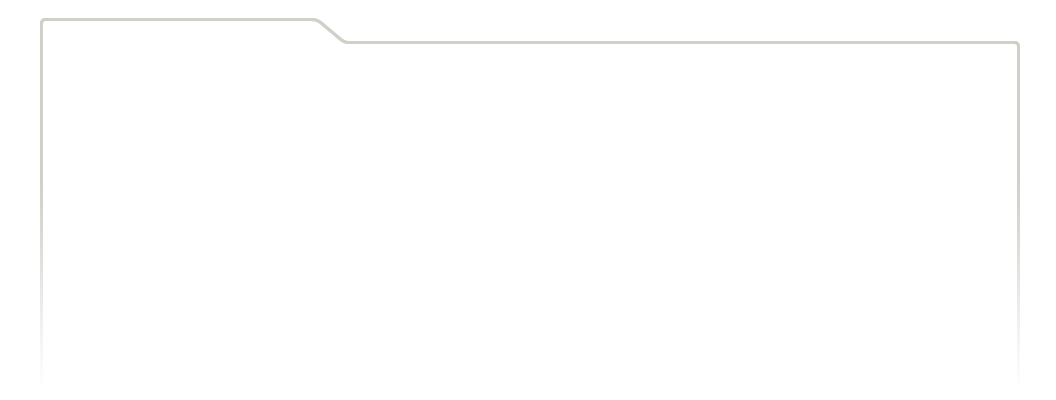
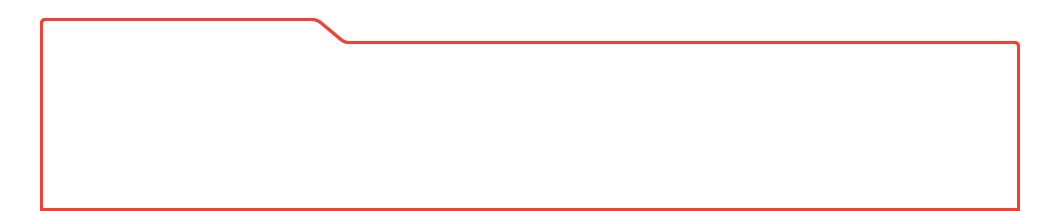
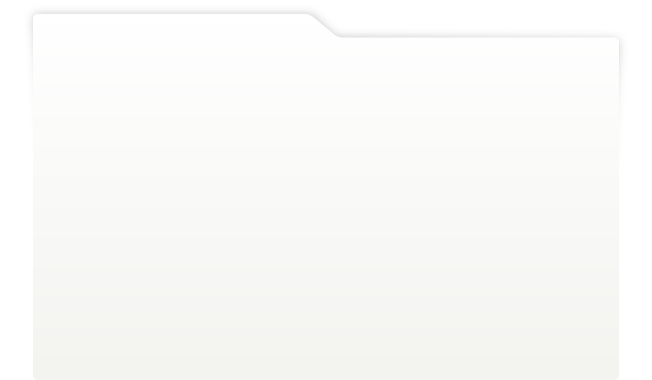
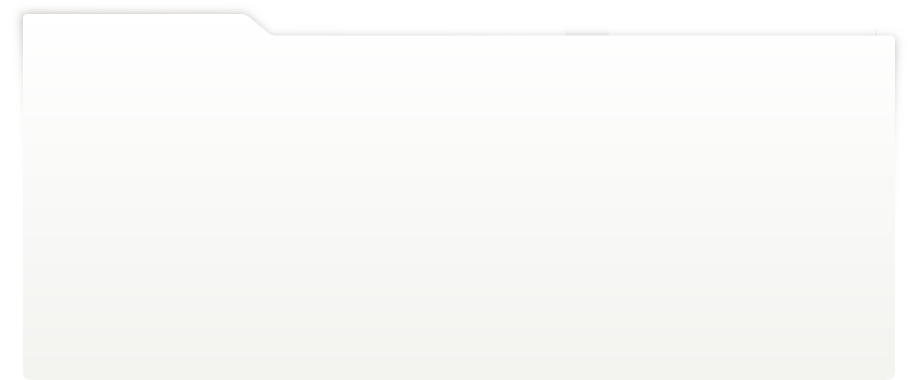
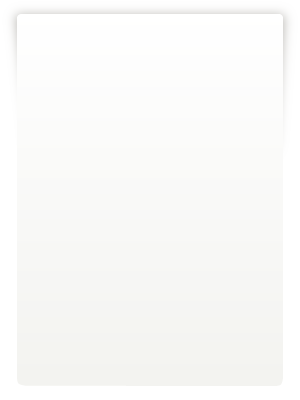
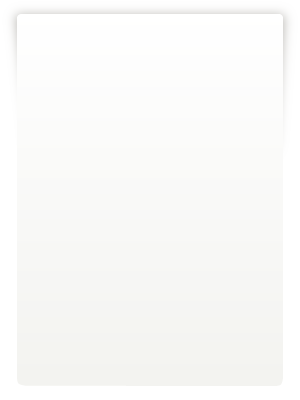
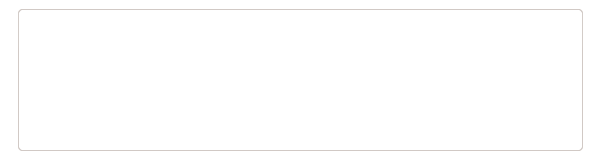
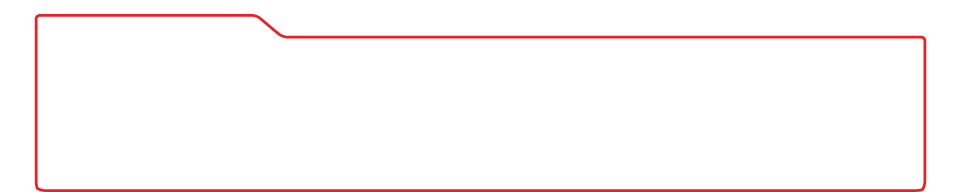
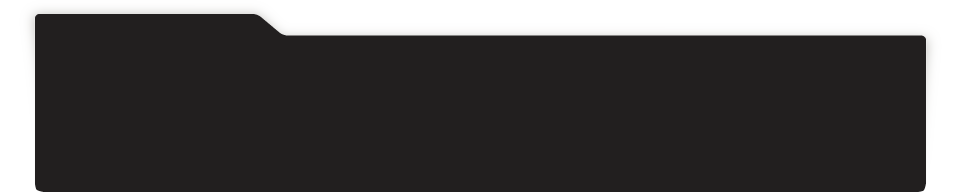
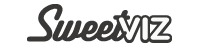
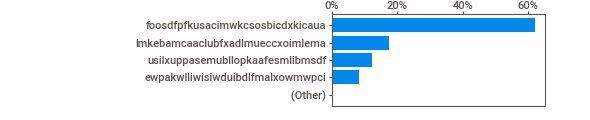
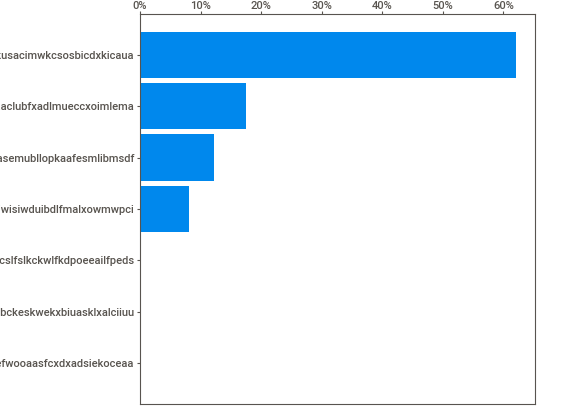
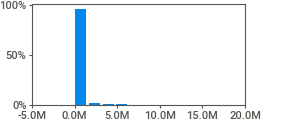
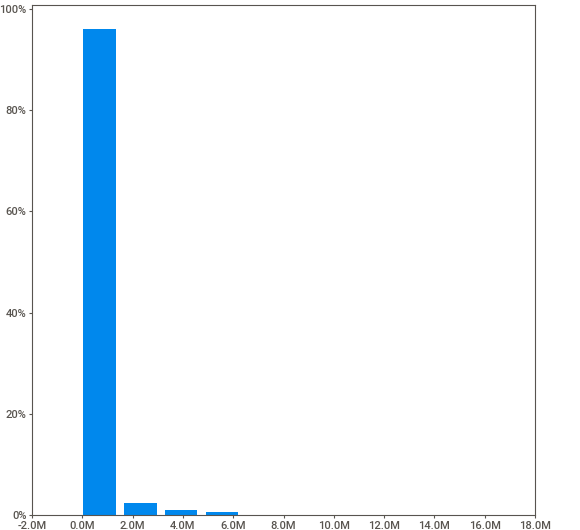
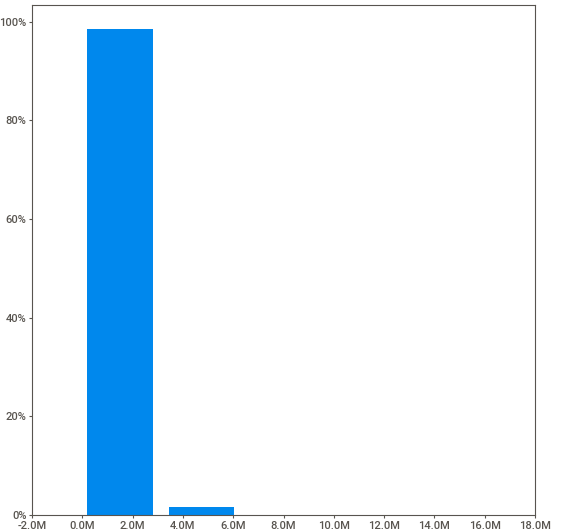
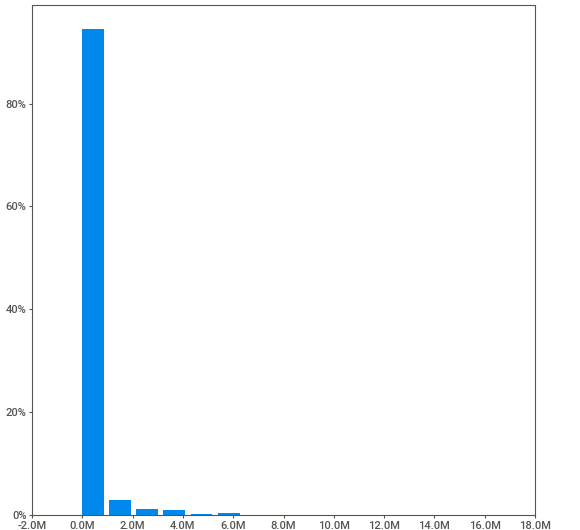
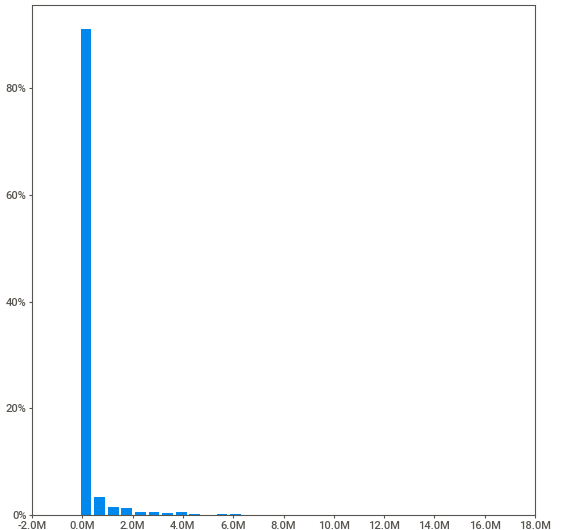
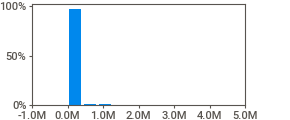
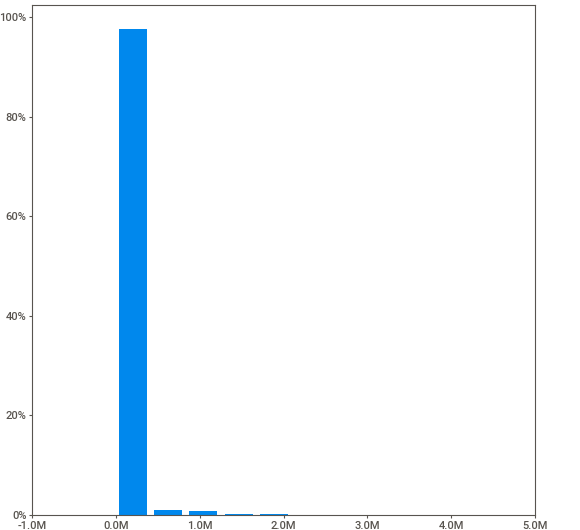
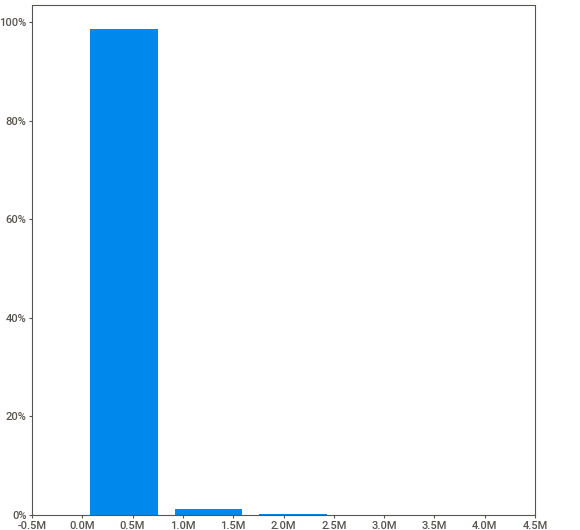
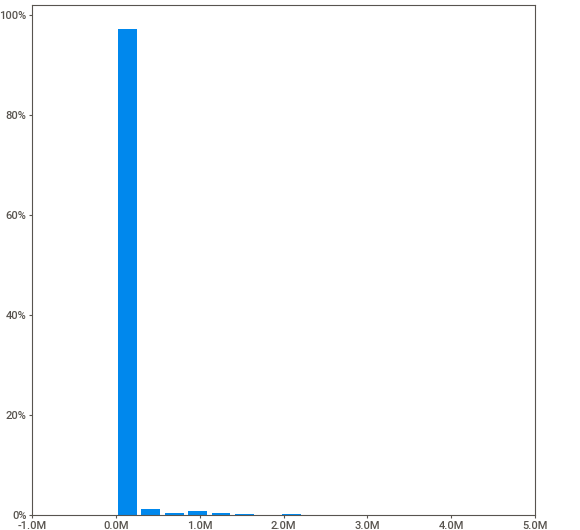
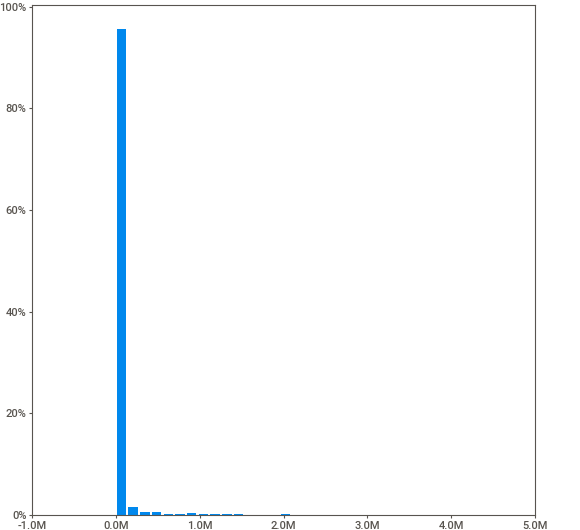
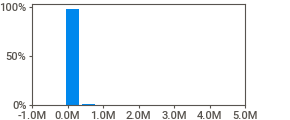
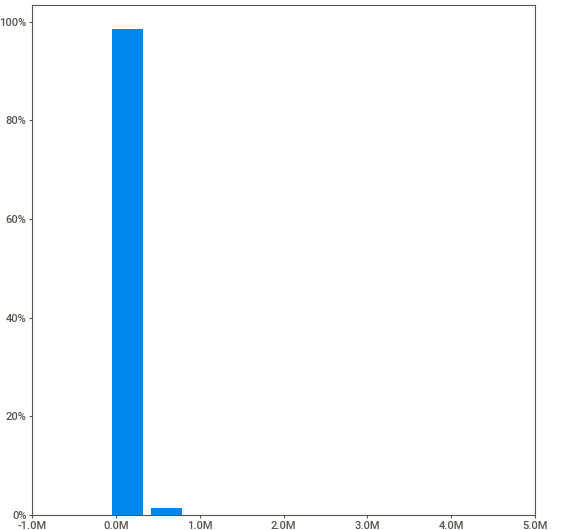
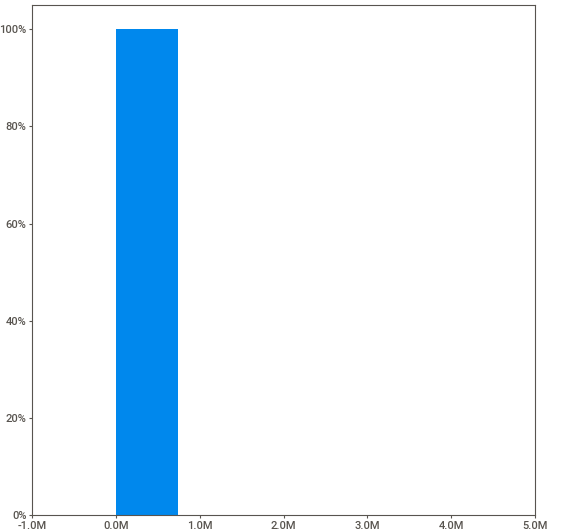
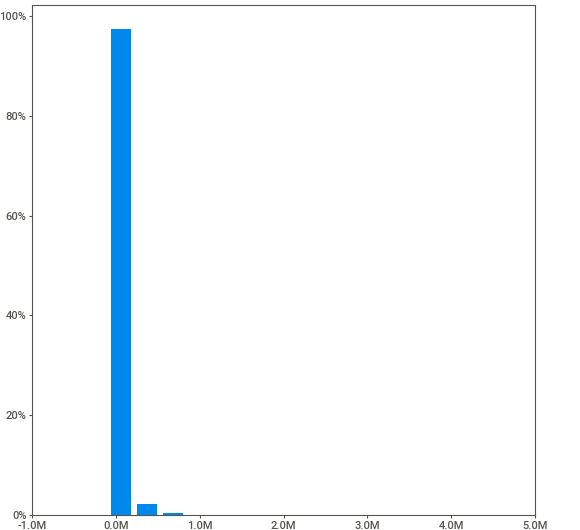
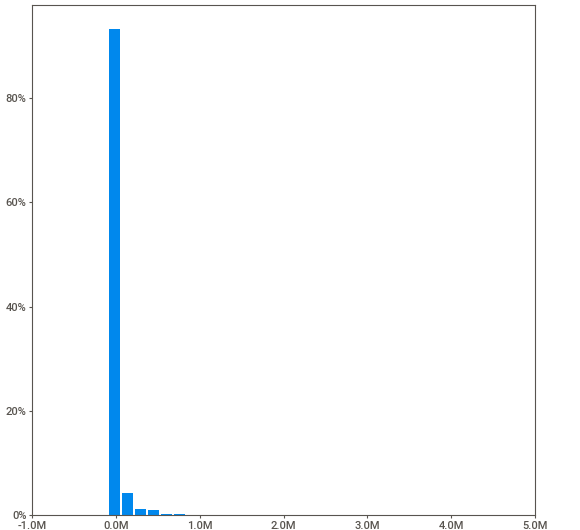
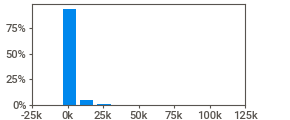
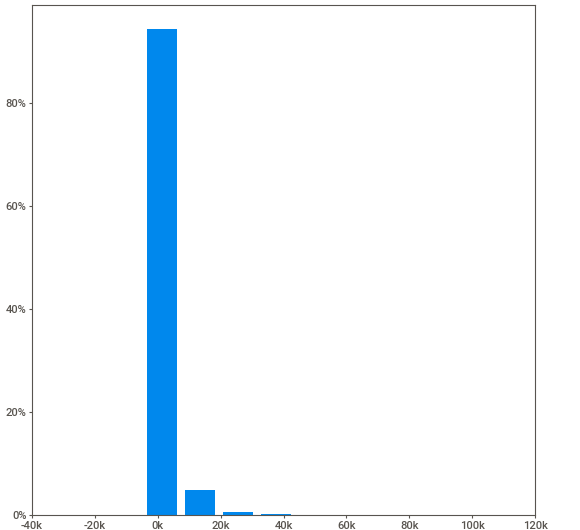
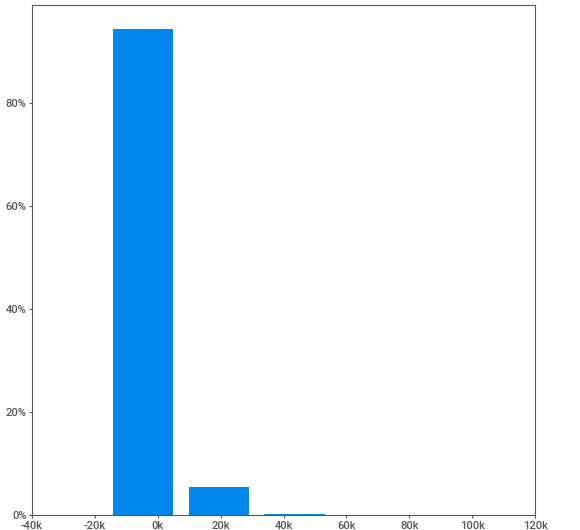
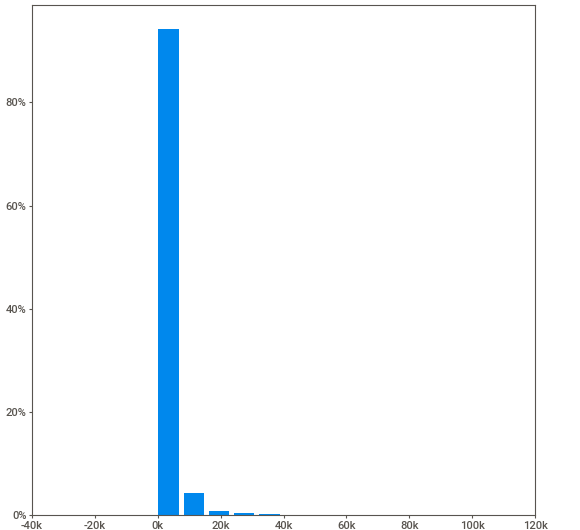
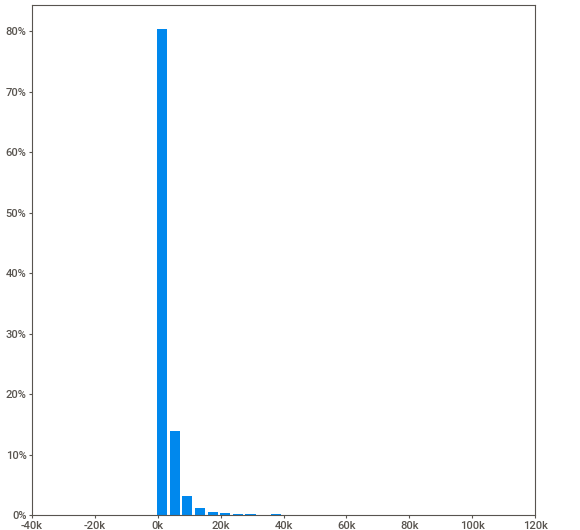
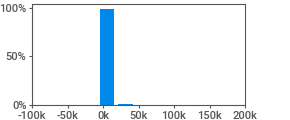
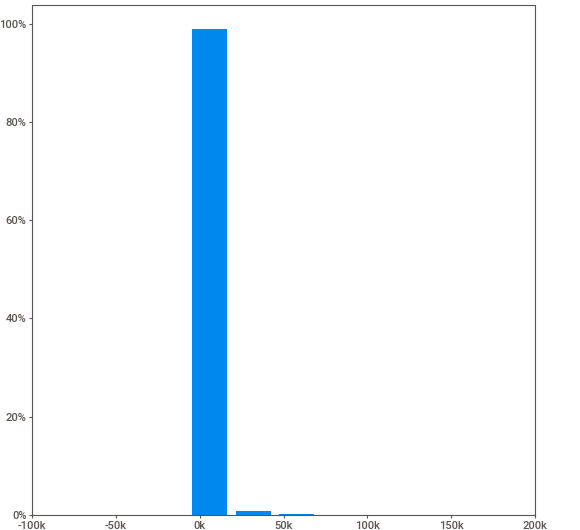
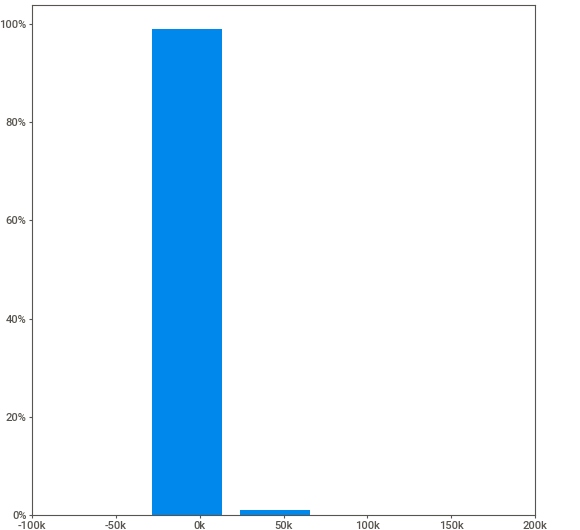
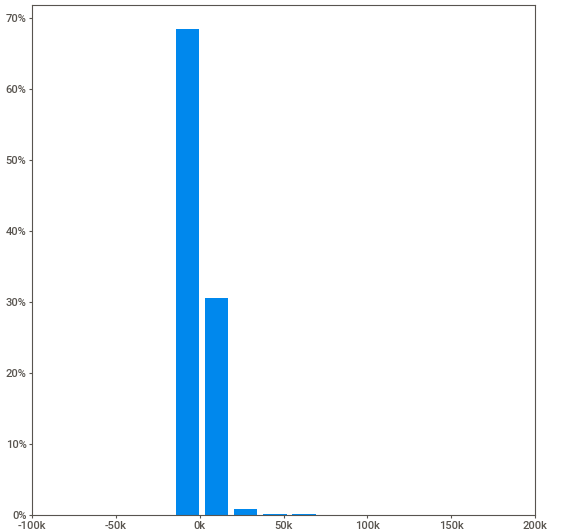
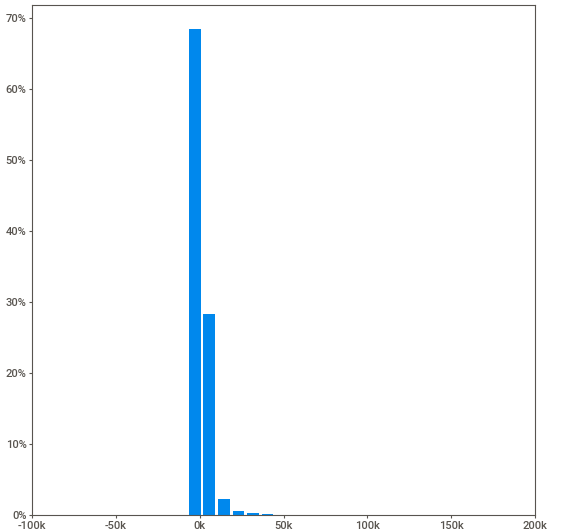
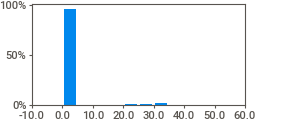
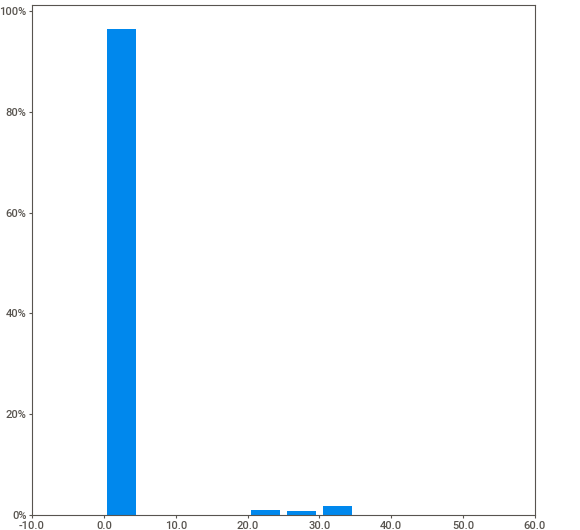
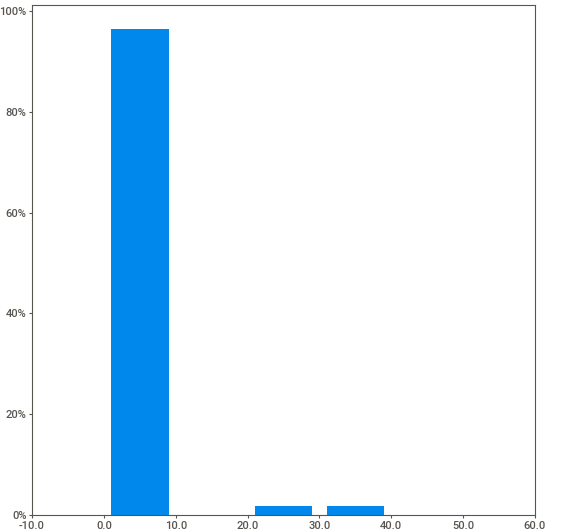
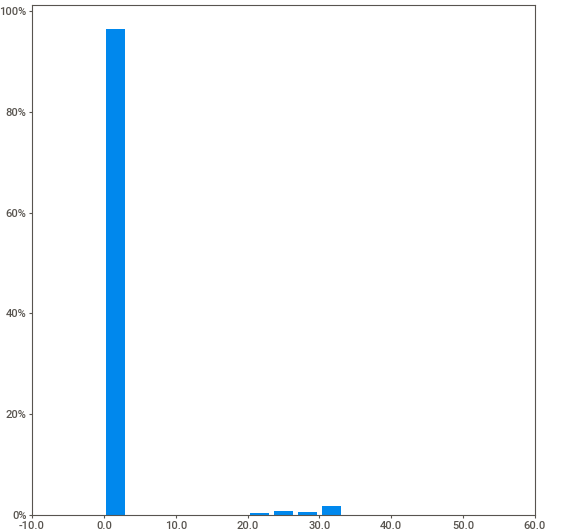
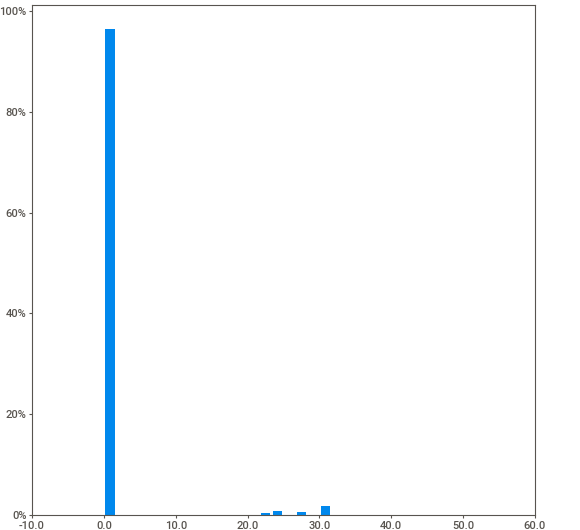
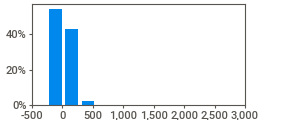
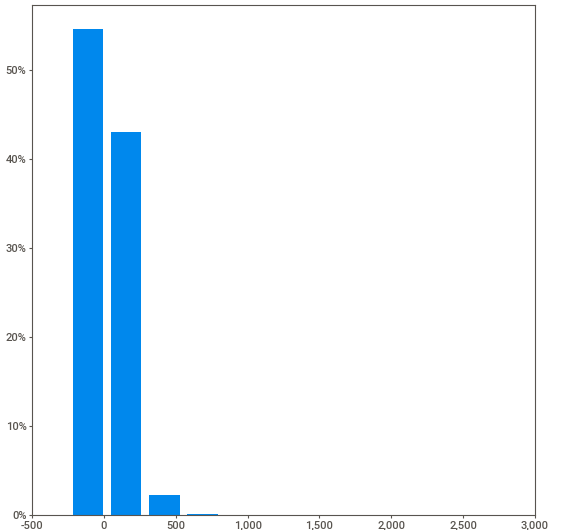
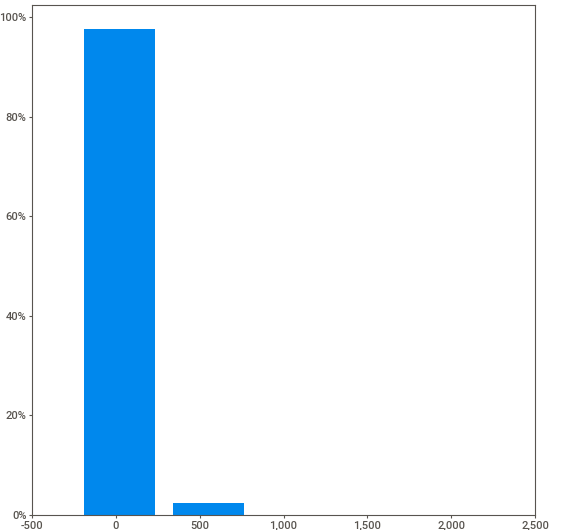
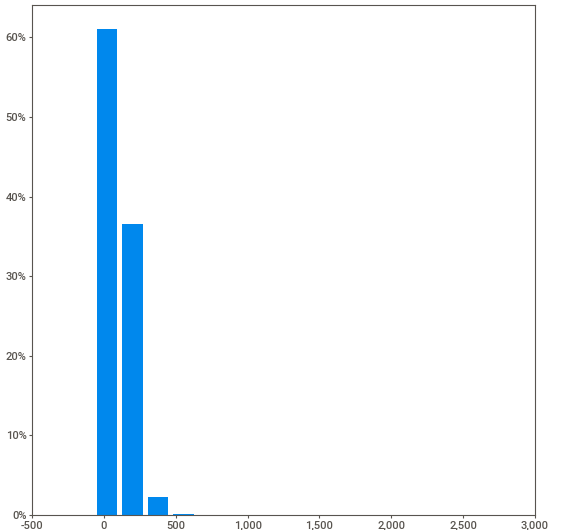
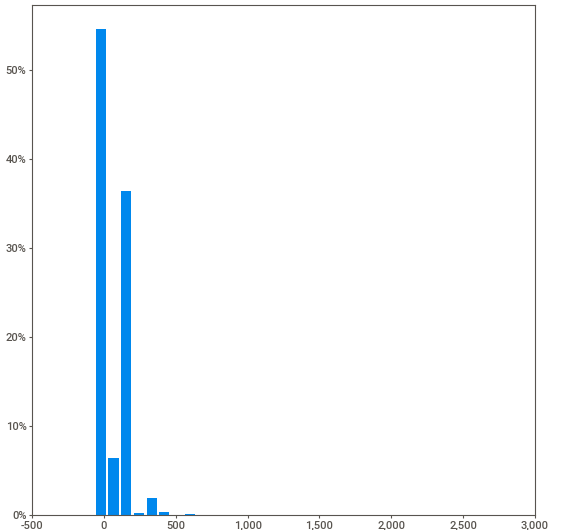
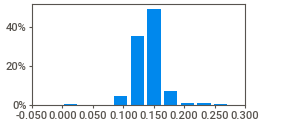
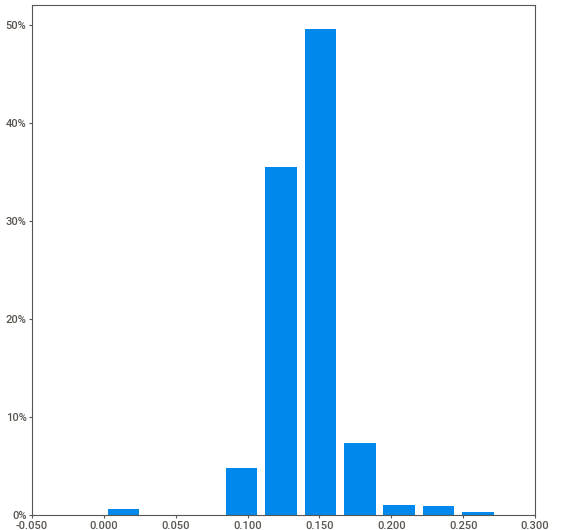
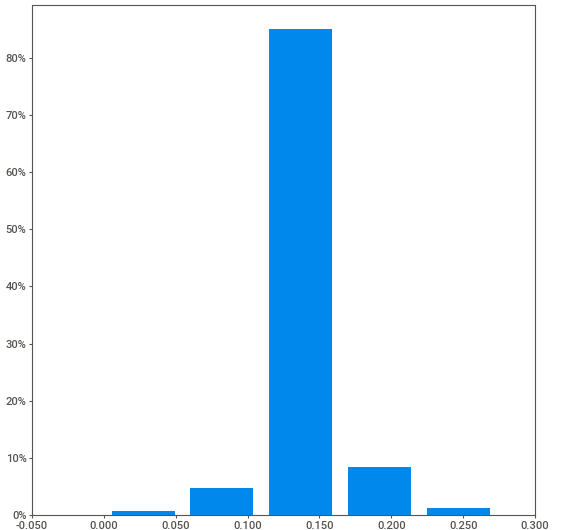
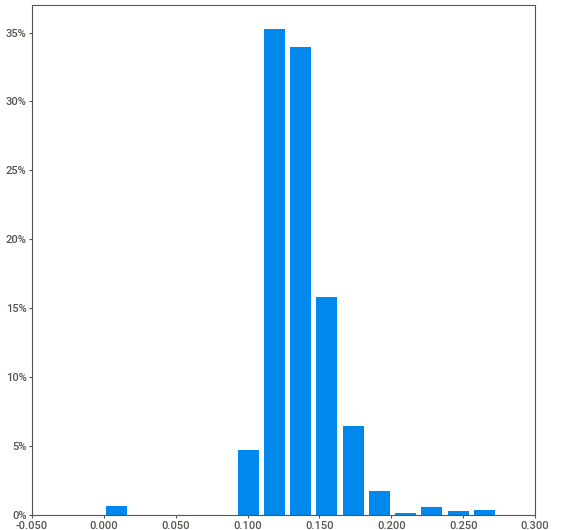
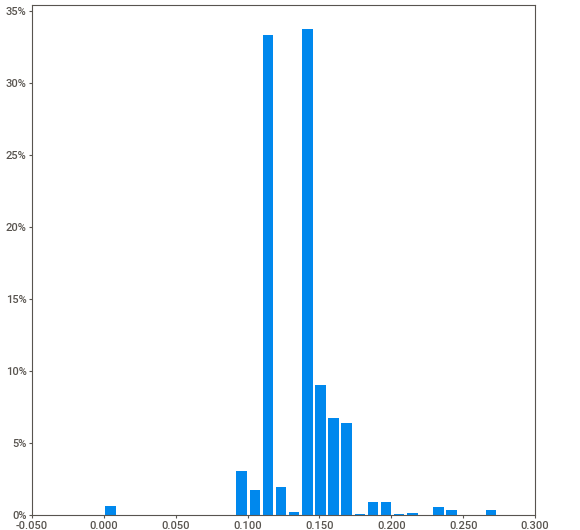
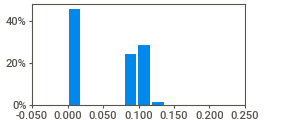
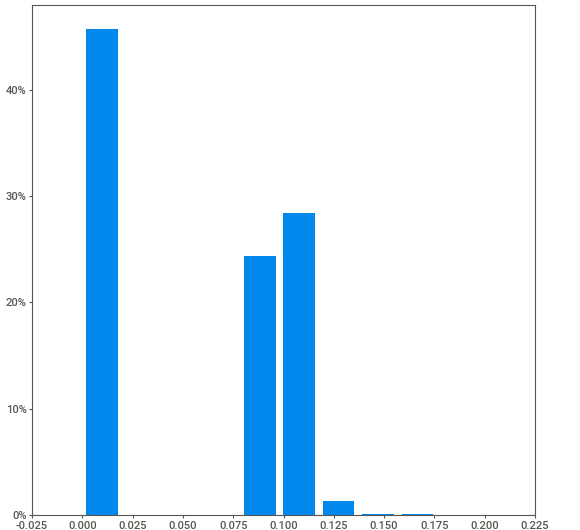
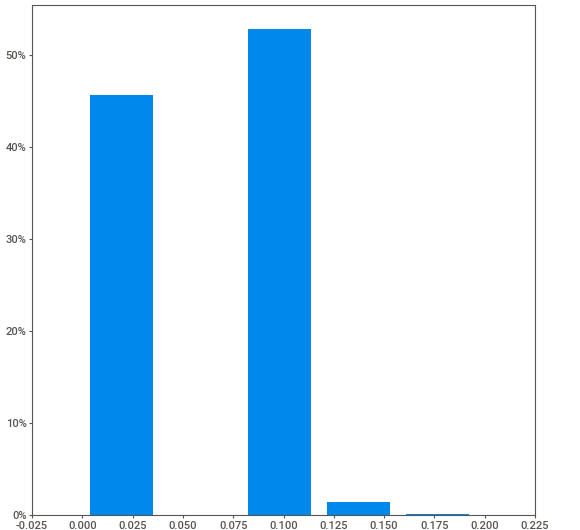
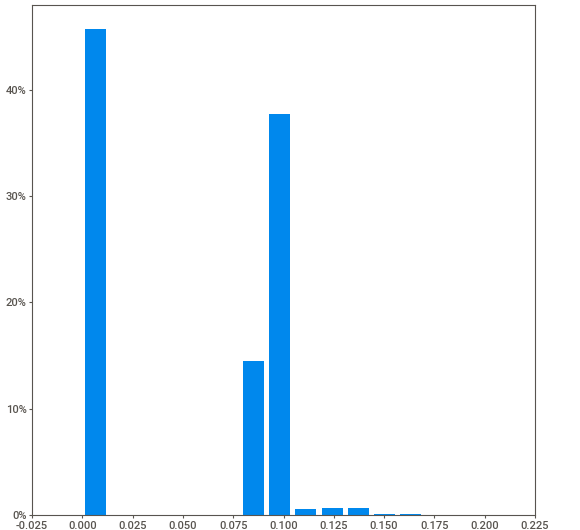
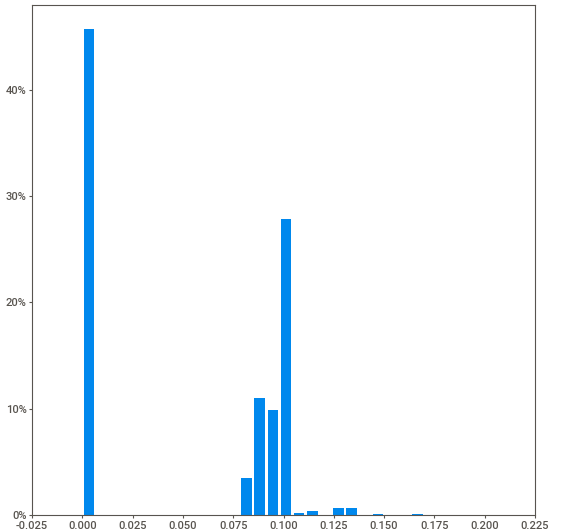
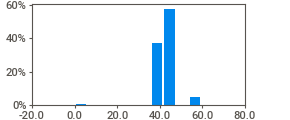
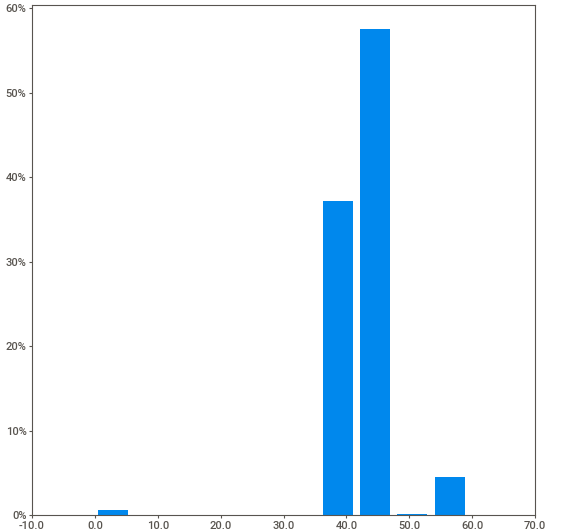
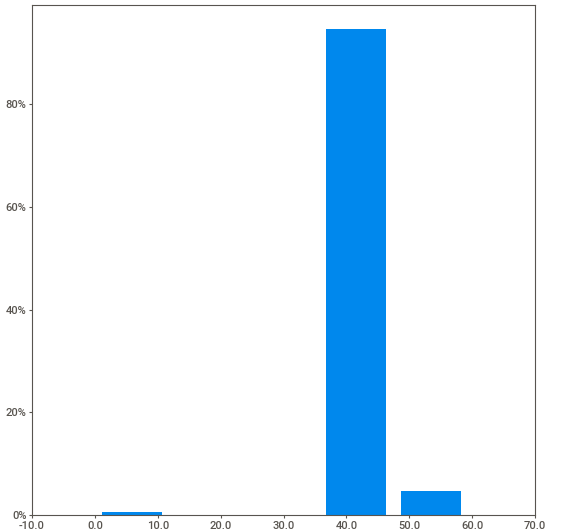
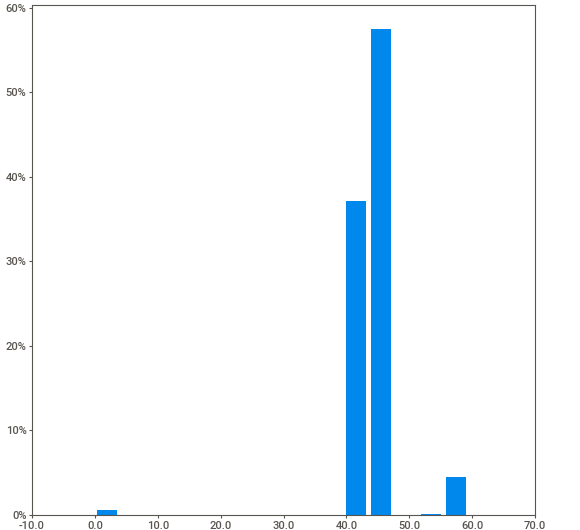
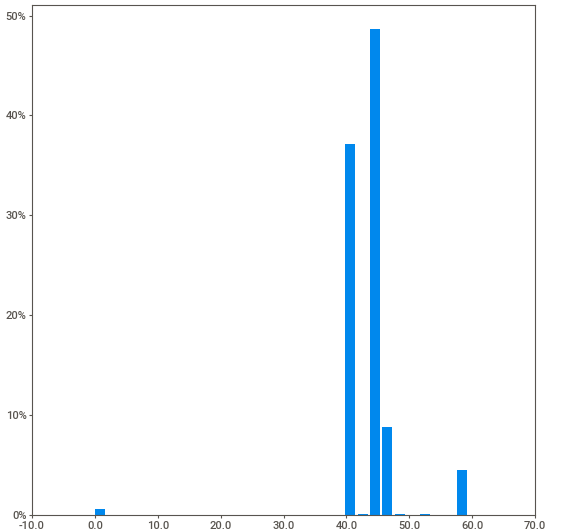
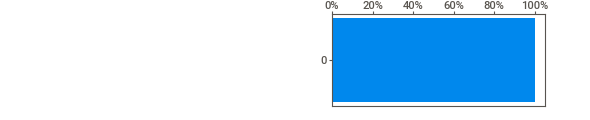
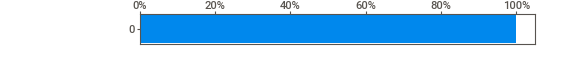
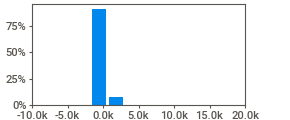
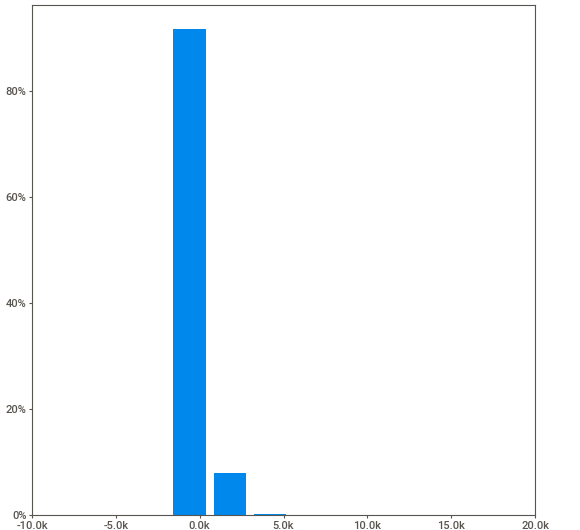
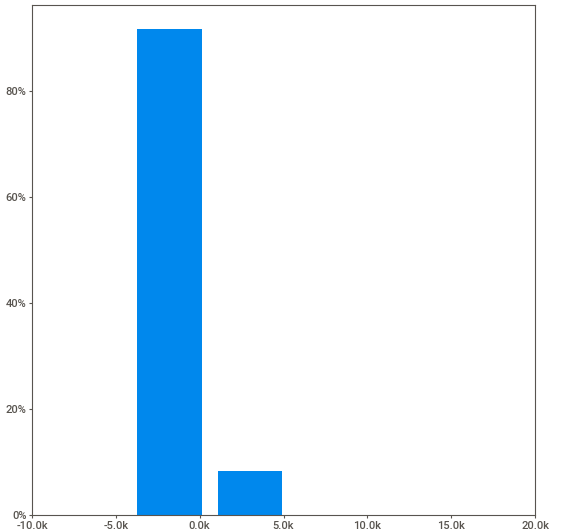
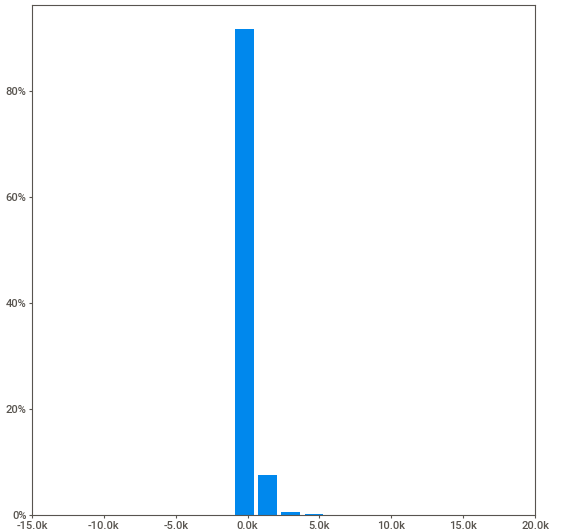
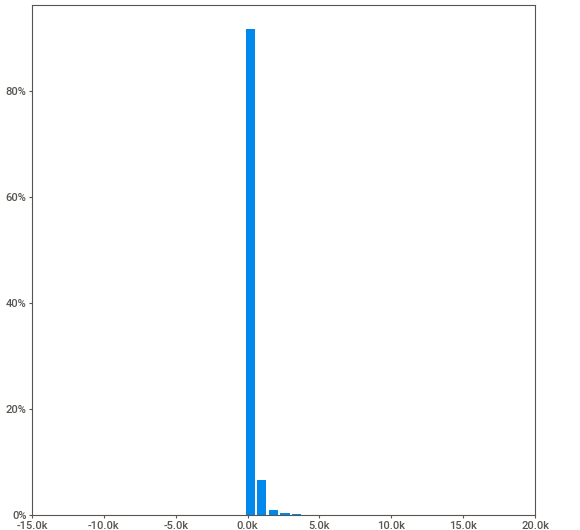
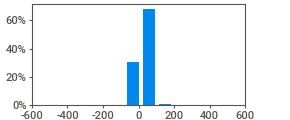
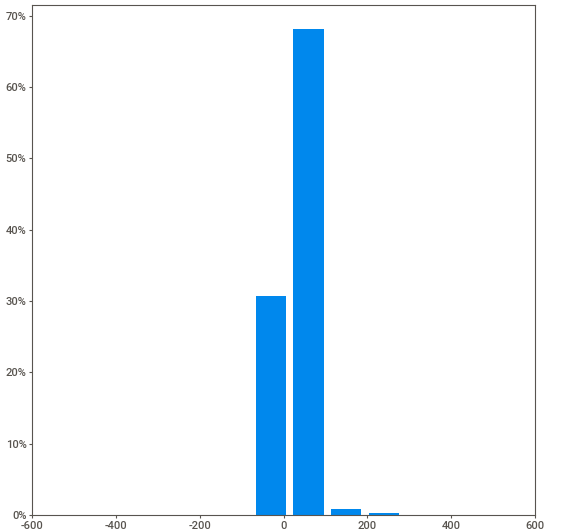
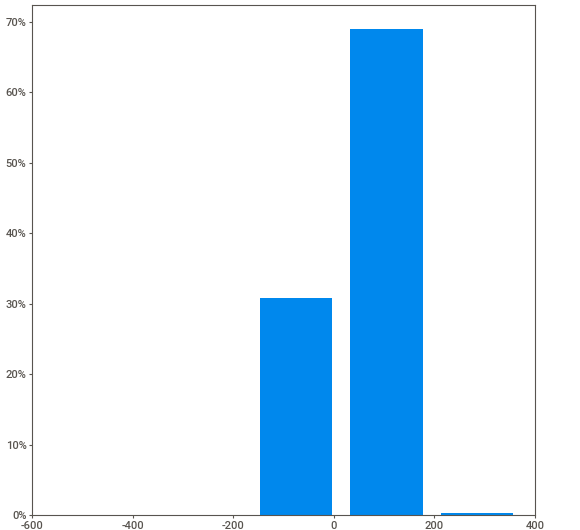
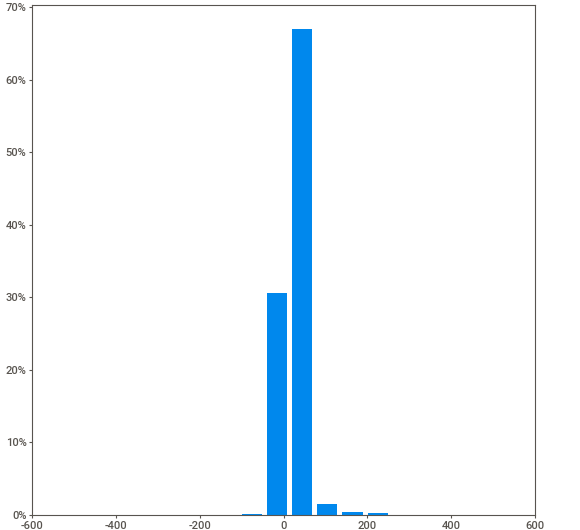
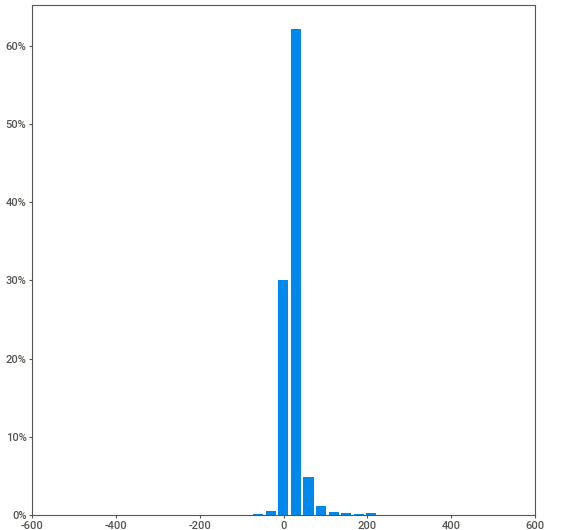
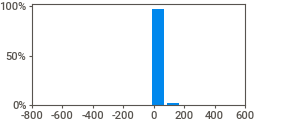
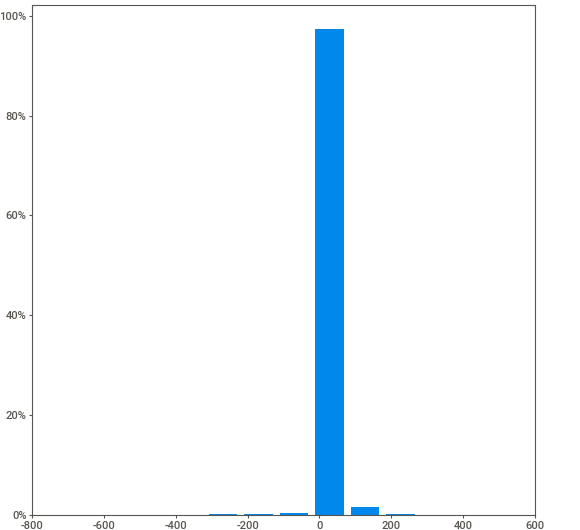
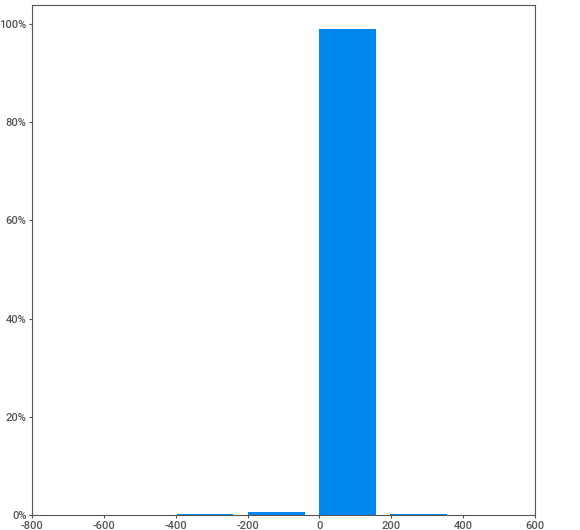
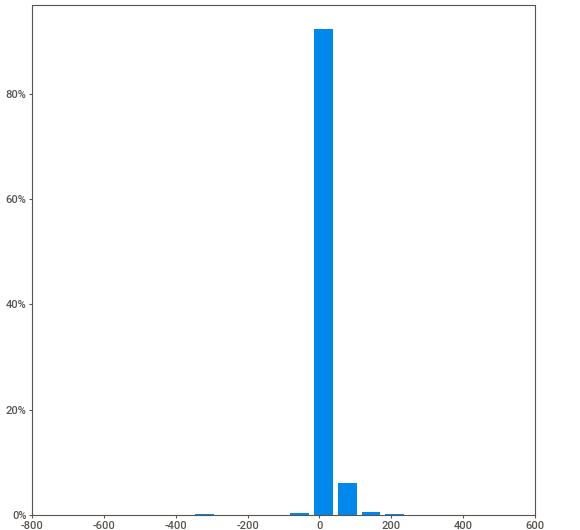
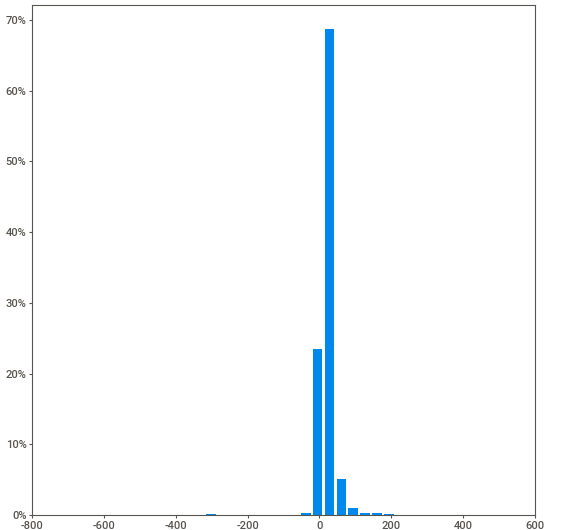
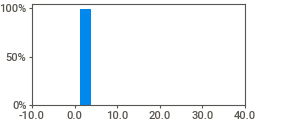
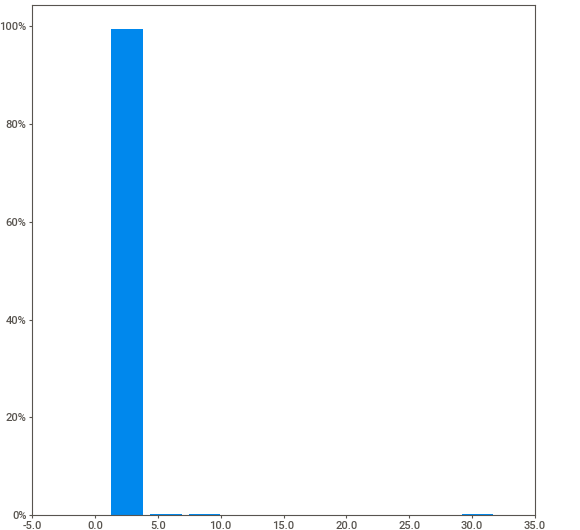
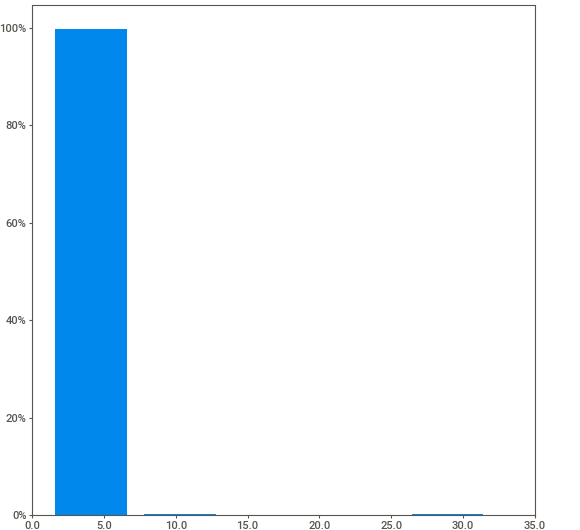
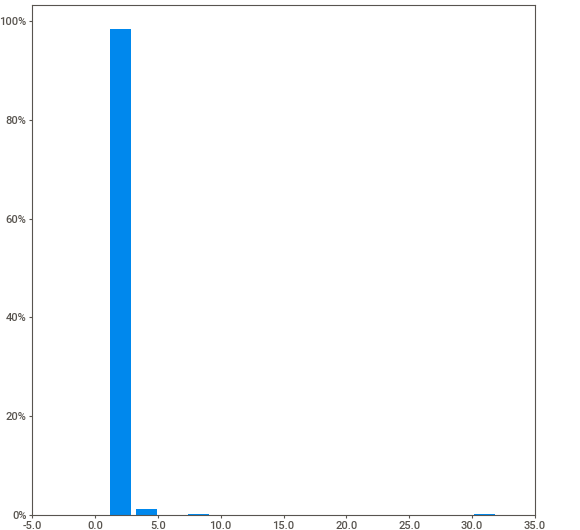
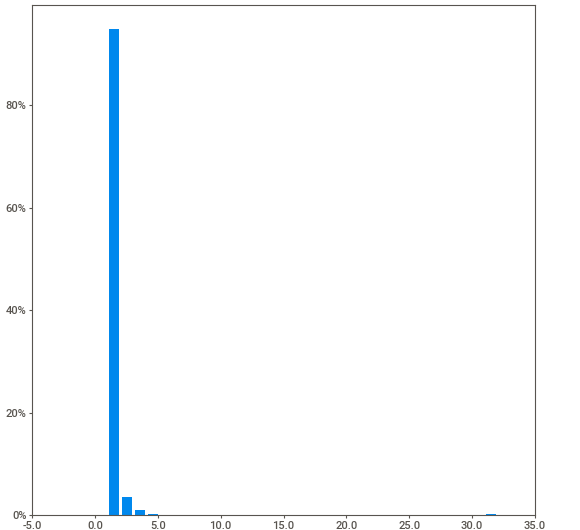
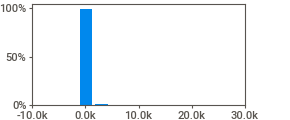
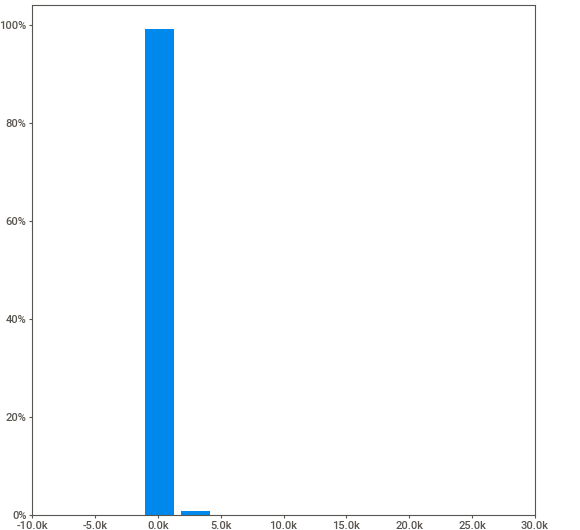
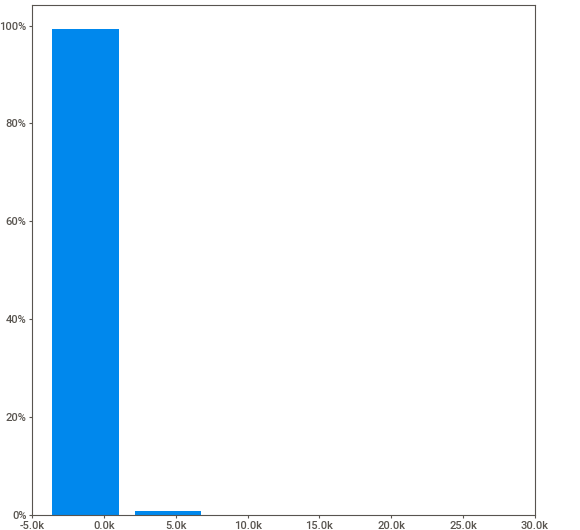
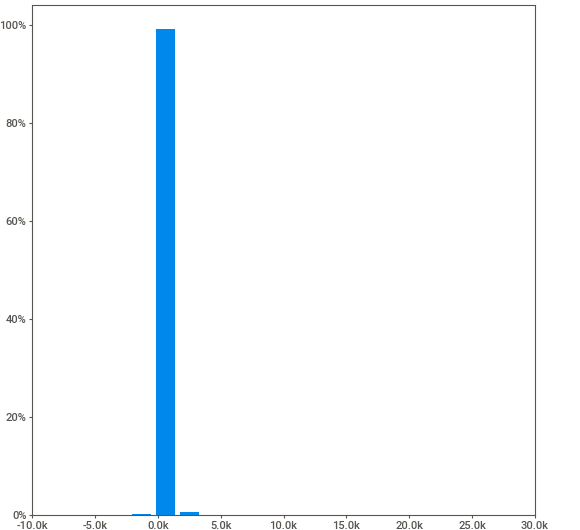
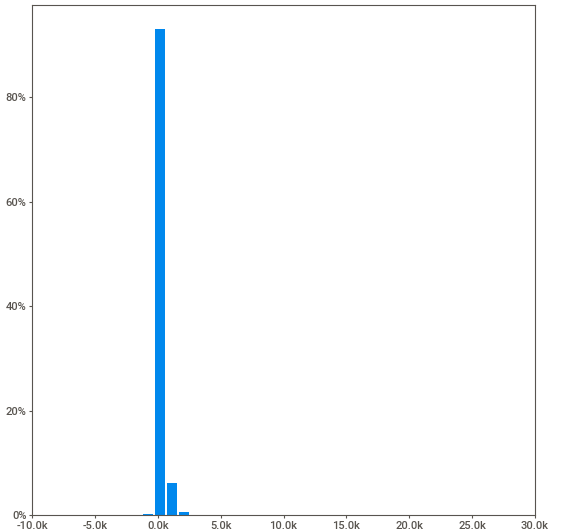
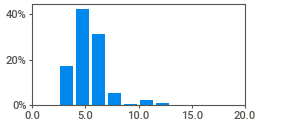
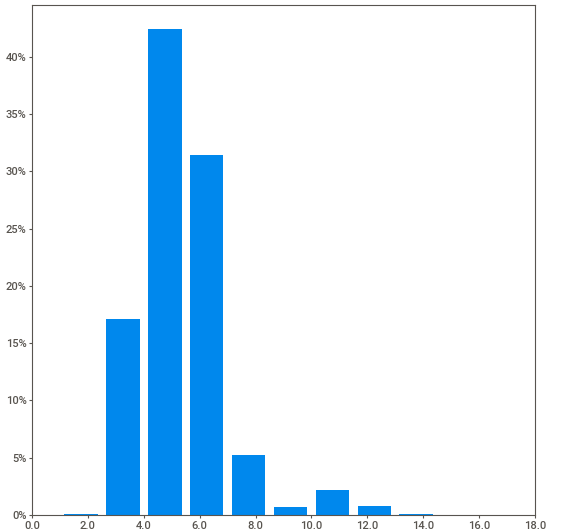
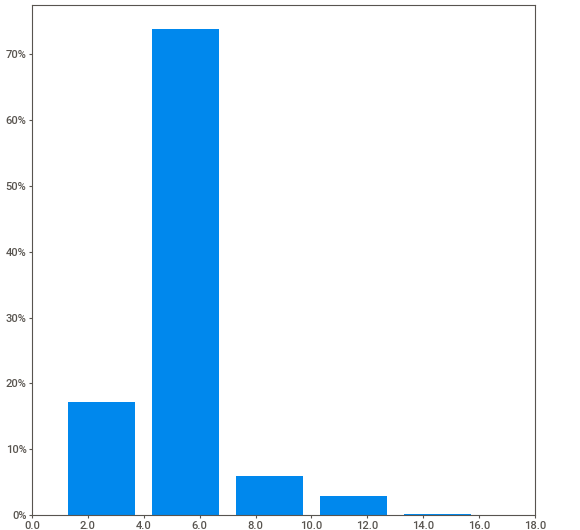
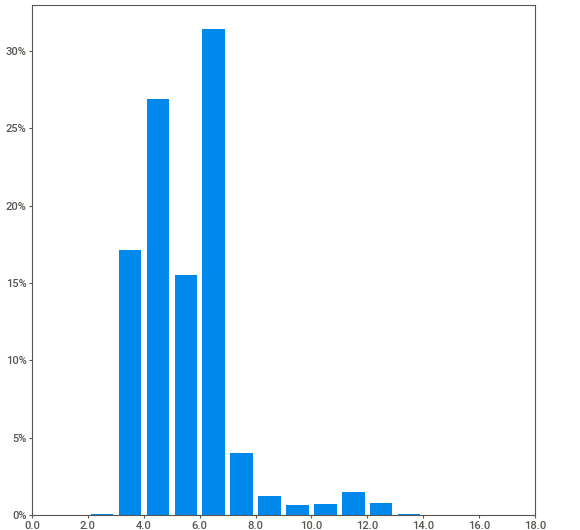
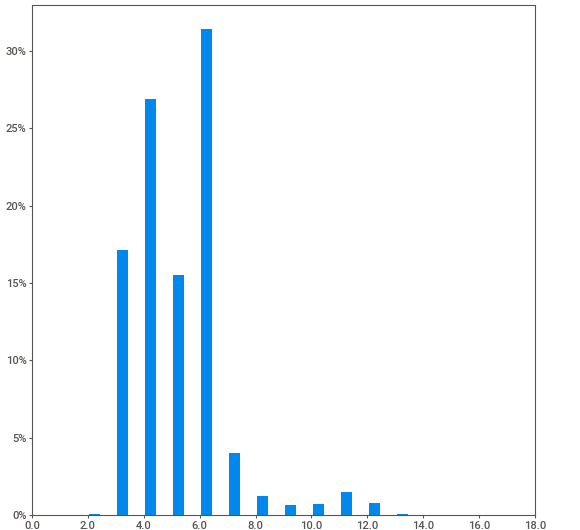
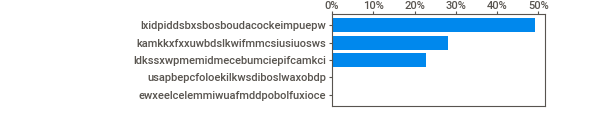
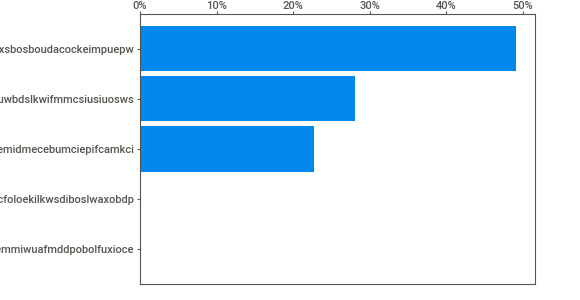
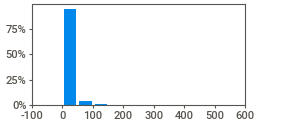
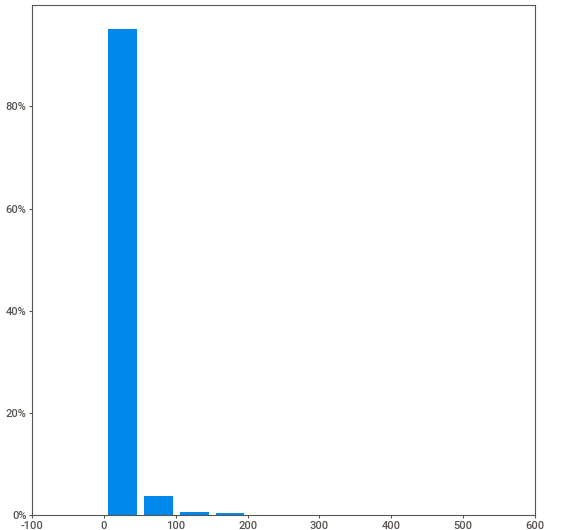
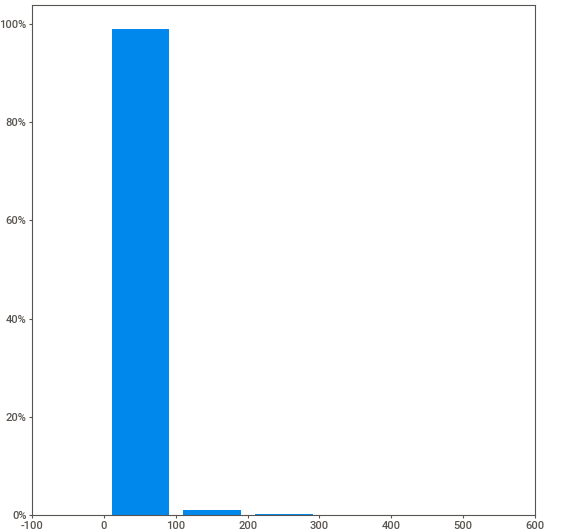
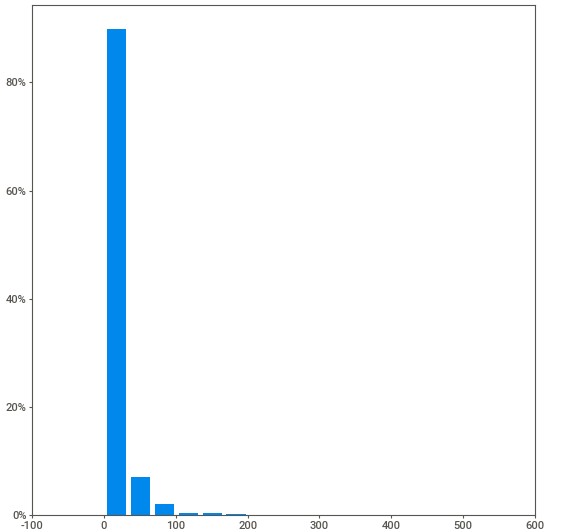
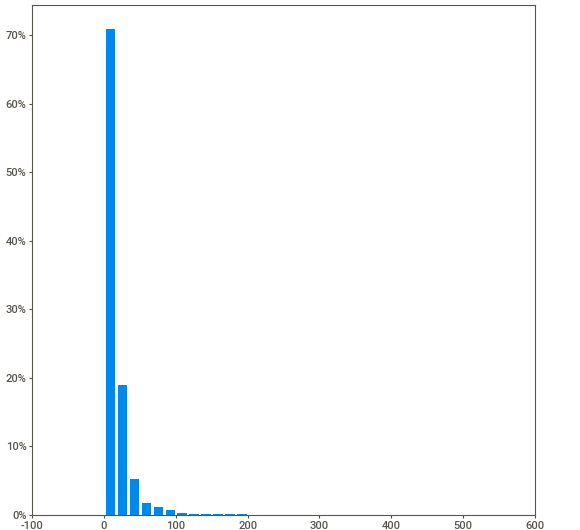
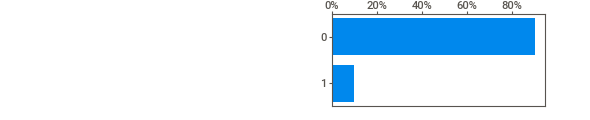
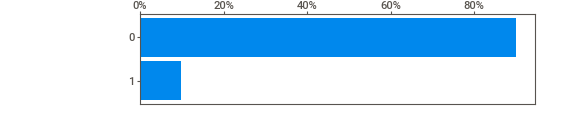
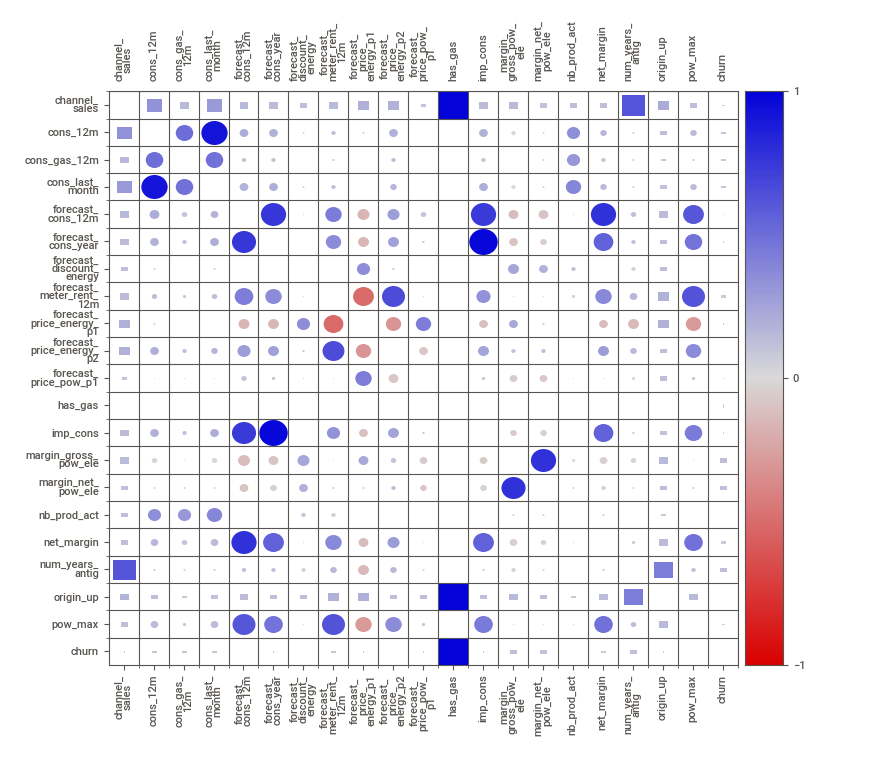
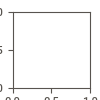

In [35]:
analysis_report_clean = sv.analyze(training_df)# perform EDA analysis
analysis_report_clean.show_notebook()
